# 환경설정

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
# 구글코랩 사용시 폰트 설정 필요
# 한글폰트를 설정해주지 않으면 그래프 상에서 한글이 깨져보임
# 한글 출력 가능하게 폰트설정
# 설치 후 런타임 재실행 필수!
# 나눔고딕 설치 (이 코드 사용 시 아래있는 폰트 로드할 경우 colab에서 오류발생 아래의 폰트 설정 꼭 주석처리!)
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# Colab의 한글폰트 설정
plt.rc('font', family = 'NanumGothic')
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus = False)

# 레티나 설정 시 글씨가 좀 더 선명히 보임
# 폰트의 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format = 'retina'

# 데이터 로드

In [ ]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/서울특별시_부동산_실거래가_정보_2020년.csv', encoding='cp949')
df.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(176001, 19)

In [ ]:
df.dtypes

실거래가아이디     object
지번코드        object
시군구코드        int64
자치구명        object
법정동코드        int64
법정동명        object
신고년도         int64
업무구분코드       int64
업무구분        object
물건번호         int64
대지권면적      float64
건물면적       float64
관리구분코드      object
층정보        float64
건물주용도코드      int64
건물주용도       object
물건금액         int64
건축년도       float64
건물명         object
dtype: object

In [ ]:
df.head()

,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명
0,11290-2020-4-0000066-1,1129013800101440024,11290,성북구,1129013800,장위동,2020,4,신고,1,0.0,59.92,2,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티
1,11290-2020-4-0000628-1,1129013400105080016,11290,성북구,1129013400,길음동,2020,4,신고,1,0.0,84.77,2,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아
2,11530-2020-4-0014284-1,1153010200107400029,11530,구로구,1153010200,구로동,2020,4,신고,1,NaN,36.90,0,1.0,2001,아파트,105000000,1994.0,궁전아트빌라
3,11170-2020-4-0005040-1,1117011500101930000,11170,용산구,1117011500,산천동,2020,4,신고,1,NaN,59.55,0,2.0,2001,아파트,830000000,2001.0,리버힐삼성
4,11170-2020-4-0001553-1,1117012900101930003,11170,용산구,1117012900,이촌동,2020,4,신고,1,NaN,64.43,0,5.0,2001,아파트,735000000,1971.0,강변


In [ ]:
df.isnull().sum()

실거래가아이디        0
지번코드           0
시군구코드          0
자치구명           0
법정동코드          0
법정동명           0
신고년도           0
업무구분코드         0
업무구분           0
물건번호           0
대지권면적      86854
건물면적           0
관리구분코드         0
층정보        12163
건물주용도코드        0
건물주용도          0
물건금액           0
건축년도         565
건물명        12163
dtype: int64

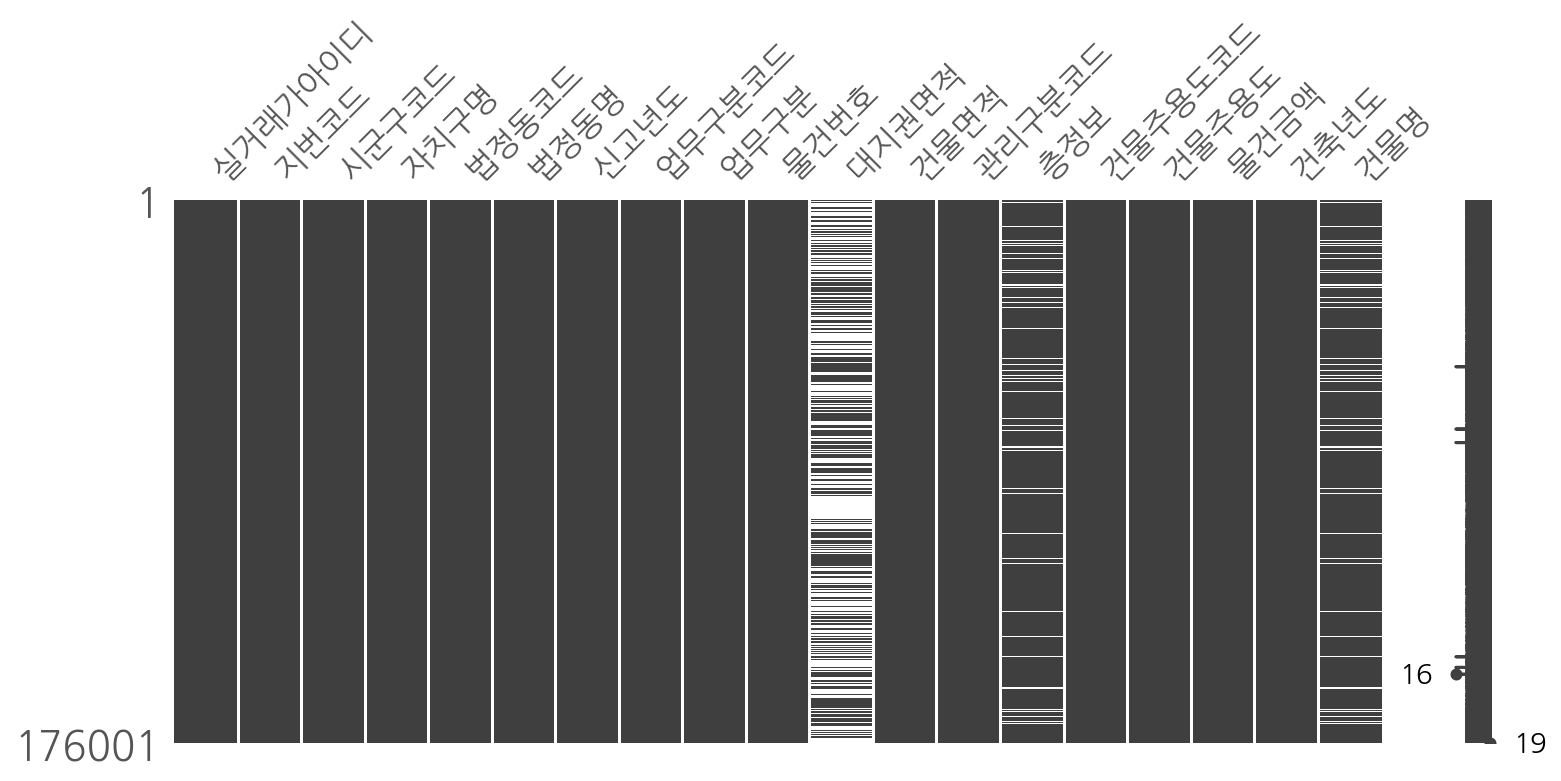

In [ ]:
# 결측치 시각화
import missingno as msno

msno.matrix(df, figsize = (12,5))

In [ ]:
# 필요한 데이터만
df = df.loc[:,['자치구명', '법정동명', '건물면적', '건물주용도', '물건금액']].copy()
df

,자치구명,법정동명,건물면적,건물주용도,물건금액
0,성북구,장위동,59.92,아파트,749000000
1,성북구,길음동,84.77,아파트,1200000000
2,구로구,구로동,36.90,아파트,105000000
3,용산구,산천동,59.55,아파트,830000000
4,용산구,이촌동,64.43,아파트,735000000
...,...,...,...,...,...
175996,마포구,상암동,294.03,단독주택,1450000000
175997,마포구,연남동,147.34,단독주택,2430000000
175998,마포구,망원동,46.77,연립주택,405000000
175999,마포구,신수동,46.41,단독주택,899900000


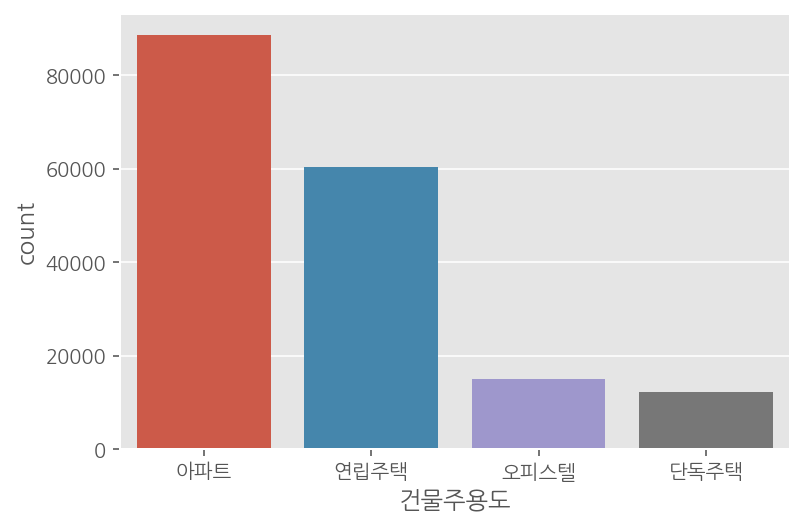

In [ ]:
sns.countplot(x = '건물주용도', data = df)

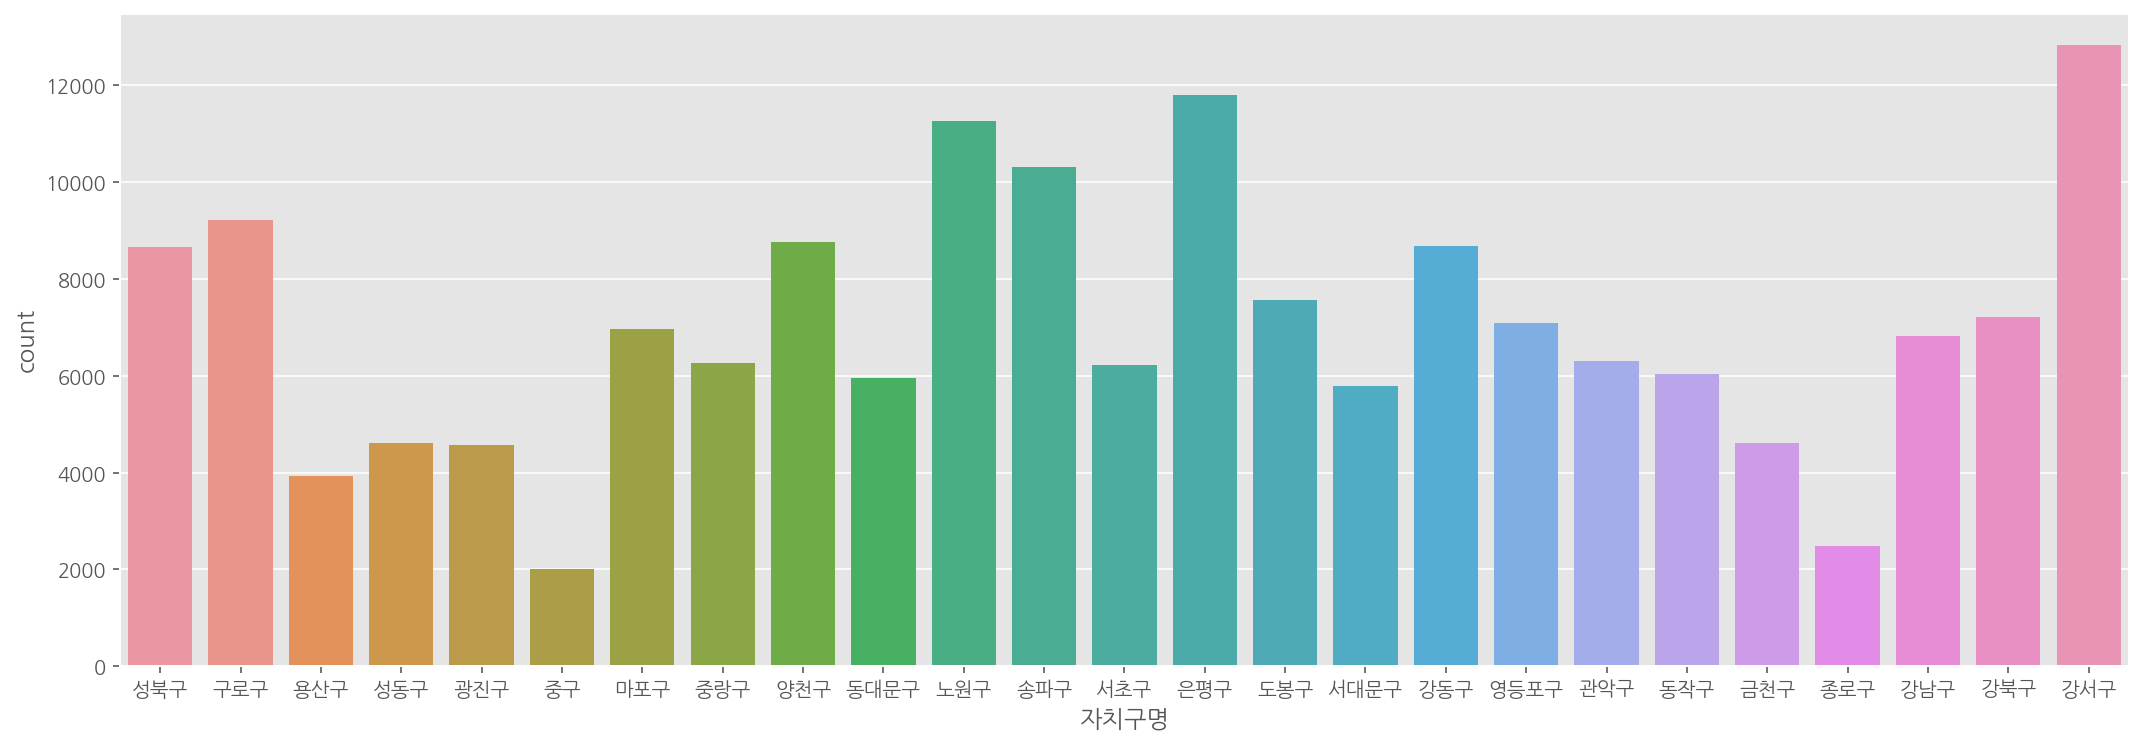

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x = '자치구명', data = df)

In [ ]:
df['법정동명'].value_counts()

화곡동      5551
상계동      4764
미아동      3281
신월동      3271
봉천동      3162
         ... 
동선동2가       1
주교동         1
원남동         1
와룡동         1
소격동         1
Name: 법정동명, Length: 401, dtype: int64

* 자치구별 거래량 top1 강서구
* 법정동명 거래량 top1 화곡동
* 건물주용도 거래량 top1 아파트

# 자치구 별 실거래가

★df.loc[:,['자치구명', '건물주용도','물건금액']]

# 아파트

In [ ]:
df1 = df[df['건물주용도'] == '아파트'].copy()
df1

,자치구명,법정동명,건물면적,건물주용도,물건금액
0,성북구,장위동,59.92,아파트,749000000
1,성북구,길음동,84.77,아파트,1200000000
2,구로구,구로동,36.90,아파트,105000000
3,용산구,산천동,59.55,아파트,830000000
4,용산구,이촌동,64.43,아파트,735000000
...,...,...,...,...,...
175970,마포구,염리동,58.71,아파트,626000000
175977,마포구,공덕동,113.67,아파트,1330000000
175979,마포구,성산동,82.01,아파트,560000000
175981,마포구,성산동,84.98,아파트,600000000


In [ ]:
df1['물건금액'].max()

9500000000

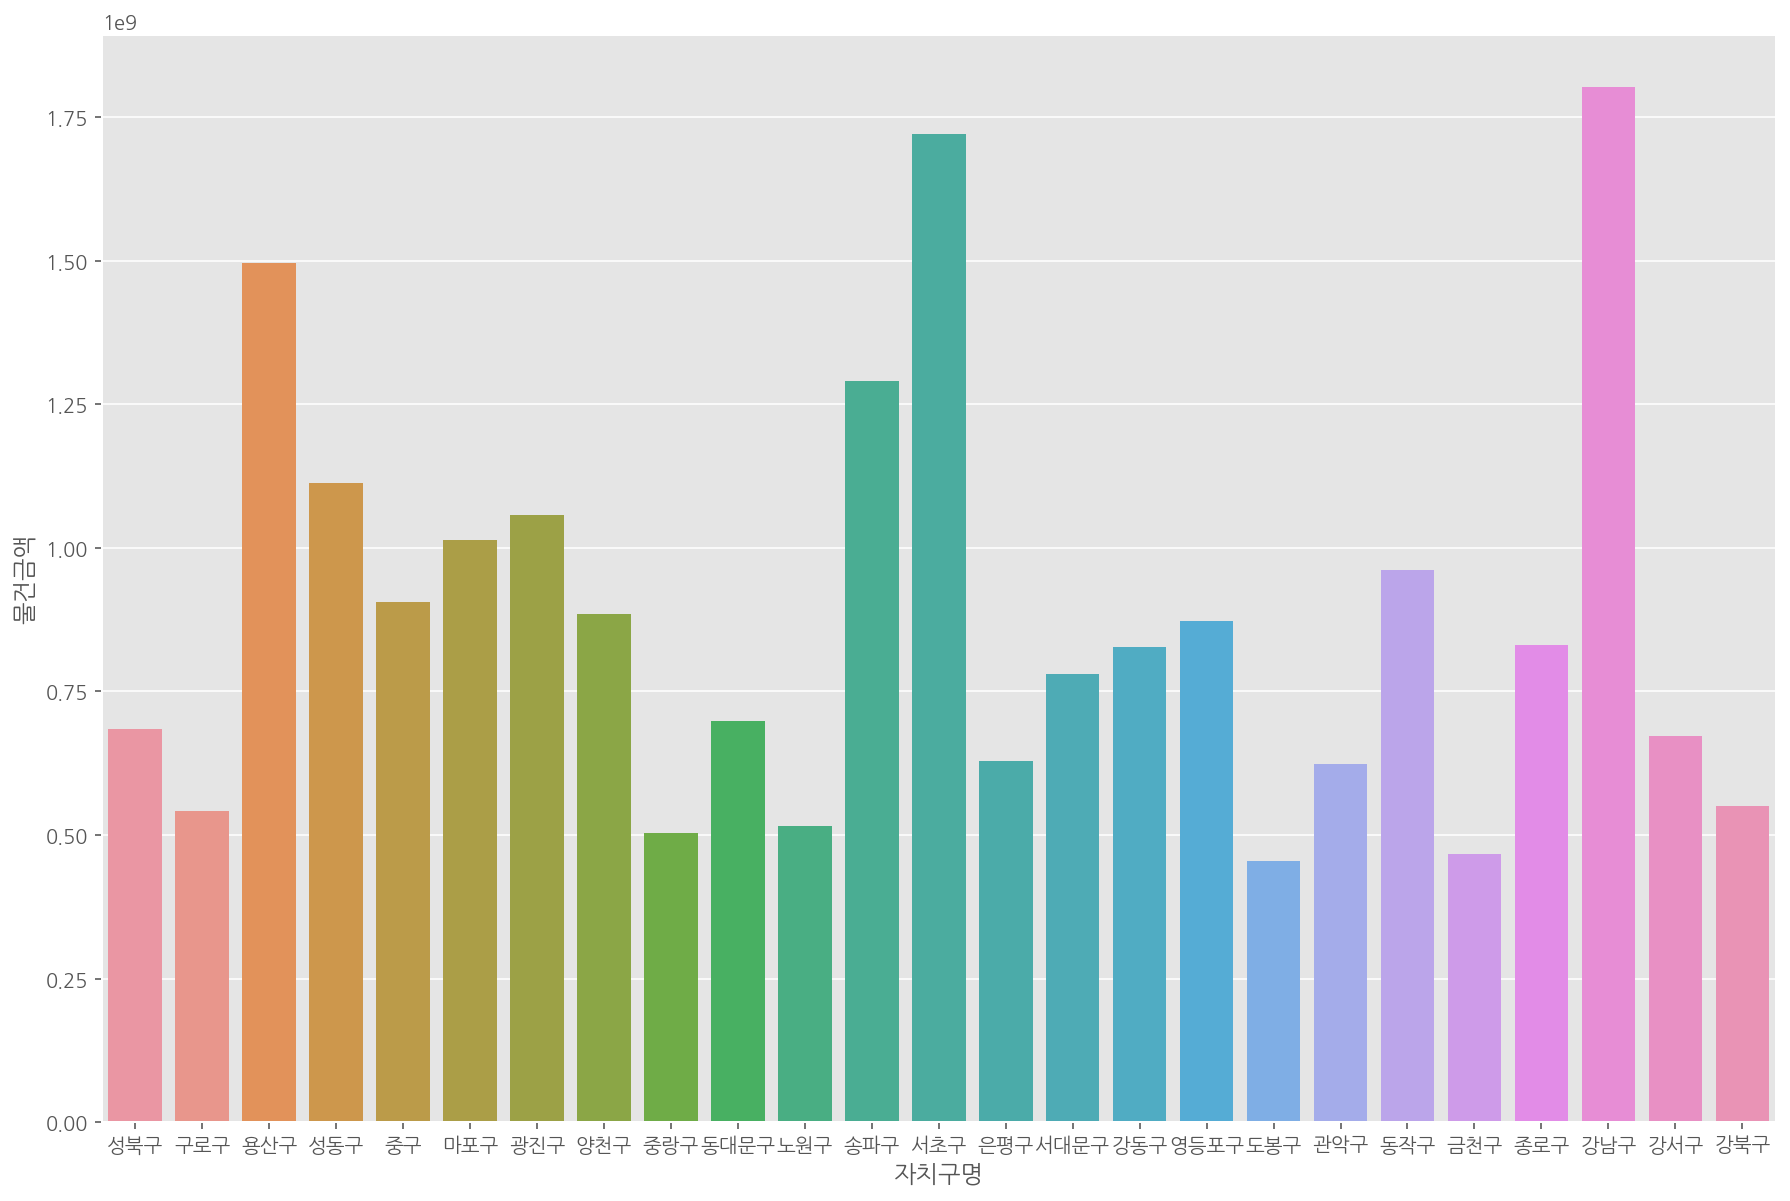

In [ ]:
# 부동산 아파트 실거래 최고가 시각화
plt.figure(figsize=(15,10))
sns.barplot(x = '자치구명', y='물건금액', data = df1, ci = None)

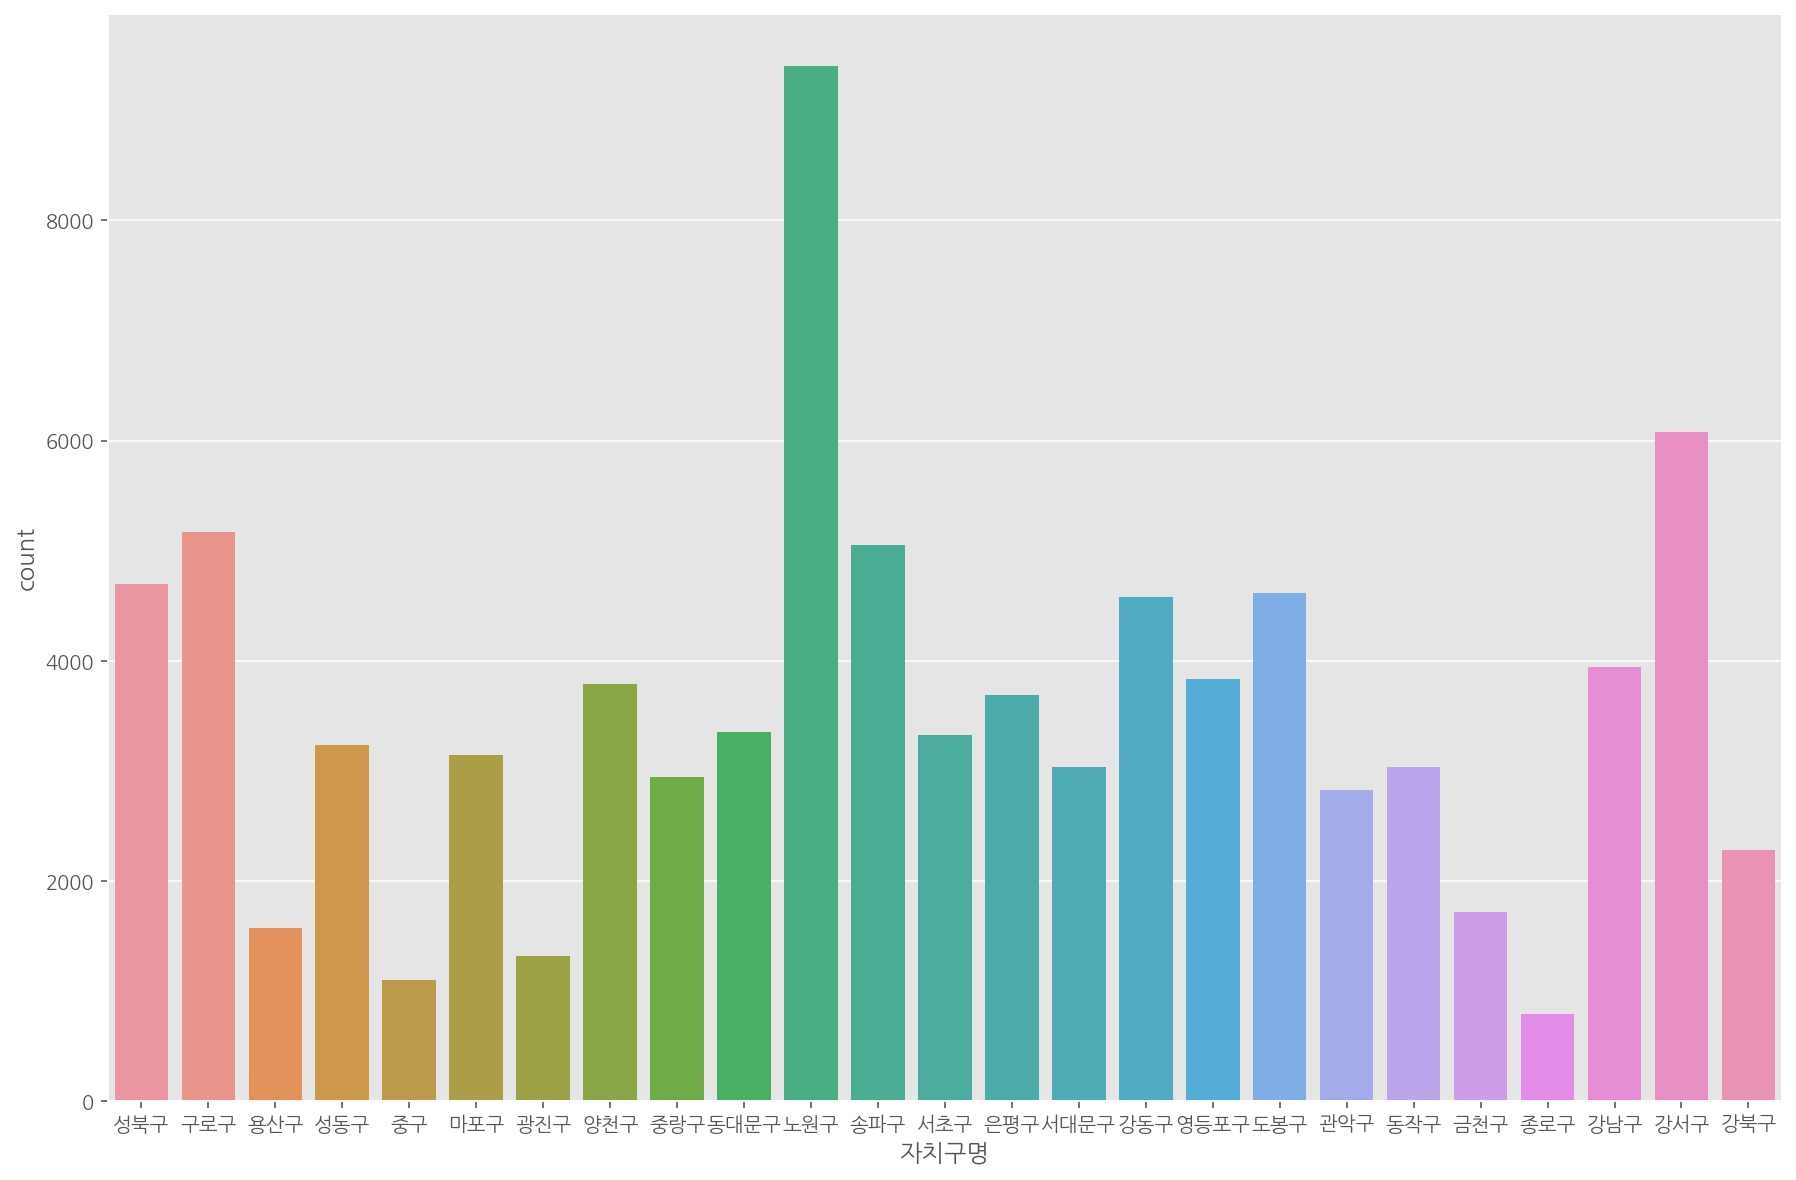

In [ ]:
# 부동산 아파트 거래량 시각화
plt.figure(figsize=(15,10))
sns.countplot(x = '자치구명', data = df1)

In [ ]:
df1['법정동명'].value_counts()

상계동      3794
중계동      2130
구로동      2037
창동       1787
봉천동      1613
         ... 
혜화동         1
신교동         1
청파동1가       1
신문로2가       1
동숭동         1
Name: 법정동명, Length: 321, dtype: int64

* 아파트는 강남>서초>용산 순으로 실거래 가격이 비쌈
* 자치구 중 거래량 top1은 노원구
* 법정동명 중 거래량 top1은 상계동

## 강남구

In [ ]:
df2 = df1[df1['자치구명'] == '강남구'].copy()
df2.head()

,자치구명,법정동명,건물면적,건물주용도,물건금액
30011,강남구,수서동,34.44,아파트,780000000
31332,강남구,압구정동,140.90,아파트,3200000000
38039,강남구,도곡동,136.04,아파트,1550000000
38041,강남구,청담동,113.57,아파트,1895000000
38042,강남구,신사동,113.31,아파트,1630000000


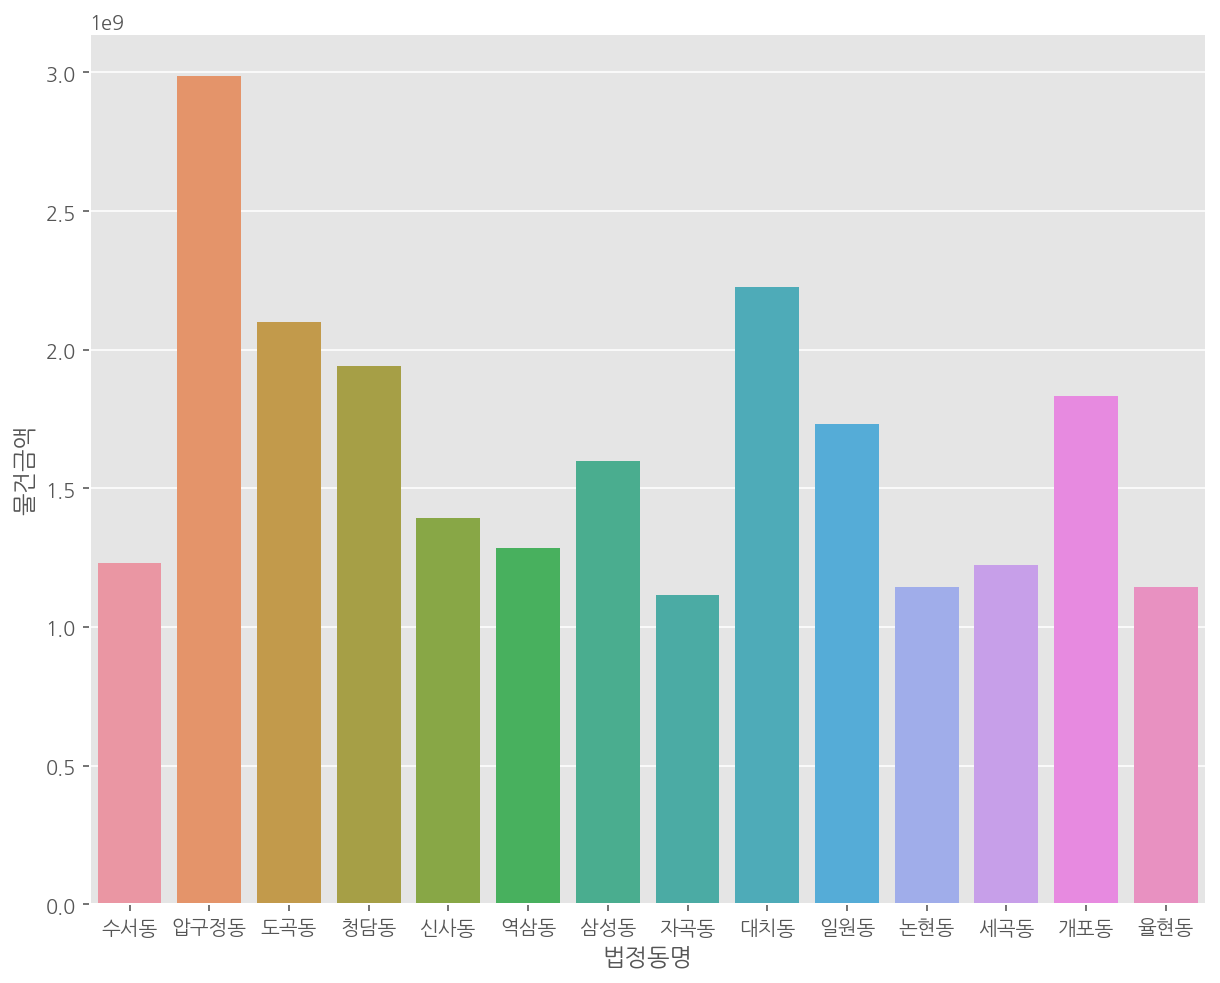

In [ ]:
# 부동산 실거래 최고가 시각화
plt.figure(figsize=(10,8))
sns.barplot(x = '법정동명', y='물건금액', data = df2, ci = None)

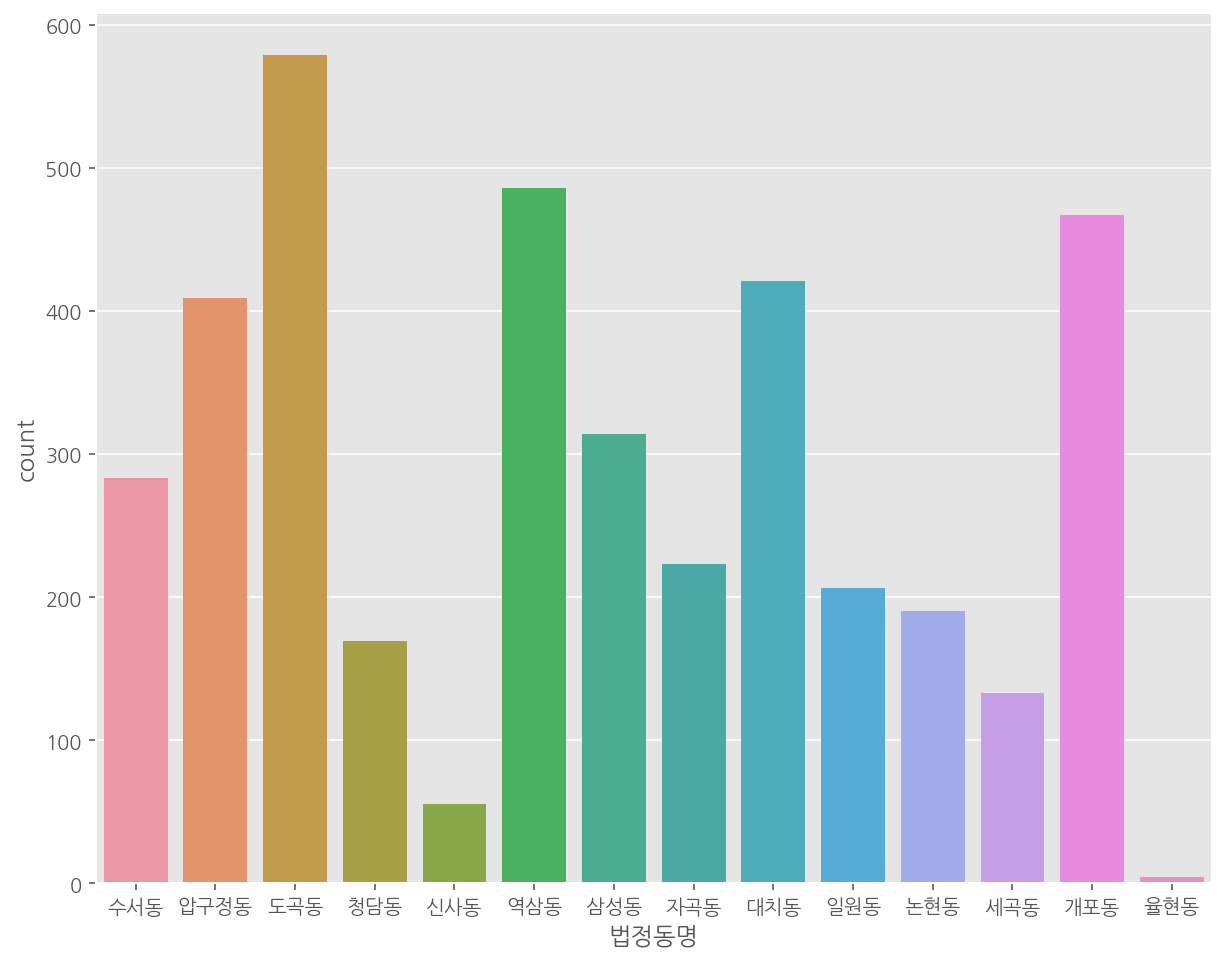

In [ ]:
# 부동산 아파트 거래량 시각화
plt.figure(figsize=(10,8))
sns.countplot(x = '법정동명', data = df2)

* 압구정>대치>도곡>청담>개포 순으로 실거래가격이 비싸다
* 법정동명 중 거래량 top1은 도곡동

## 서초구

In [ ]:
df3 = df1[df1['자치구명'] == '서초구'].copy()
df3.head()

,자치구명,법정동명,건물면적,건물주용도,물건금액
288,서초구,서초동,114.70,아파트,2520000000
31744,서초구,우면동,84.77,아파트,1150000000
31745,서초구,양재동,107.22,아파트,800000000
31746,서초구,잠원동,133.37,아파트,3500000000
31752,서초구,방배동,181.60,아파트,1850000000


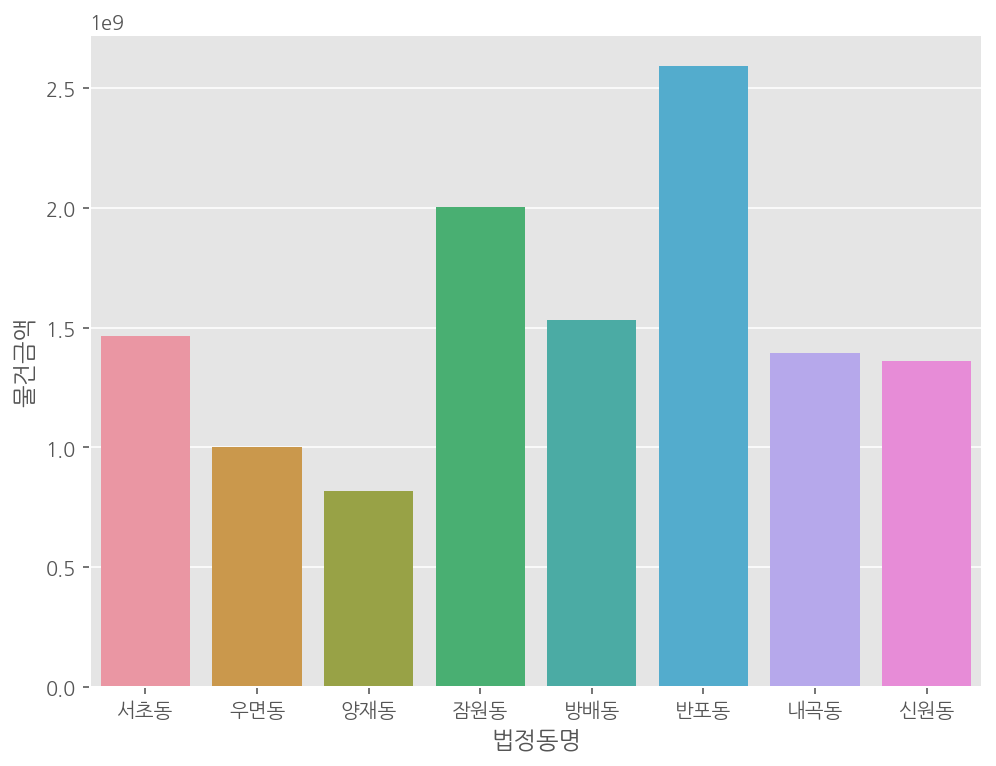

In [ ]:
# 부동산 실거래 최고가 시각화
plt.figure(figsize=(8,6))
sns.barplot(x = '법정동명', y='물건금액', data = df3, ci = None)

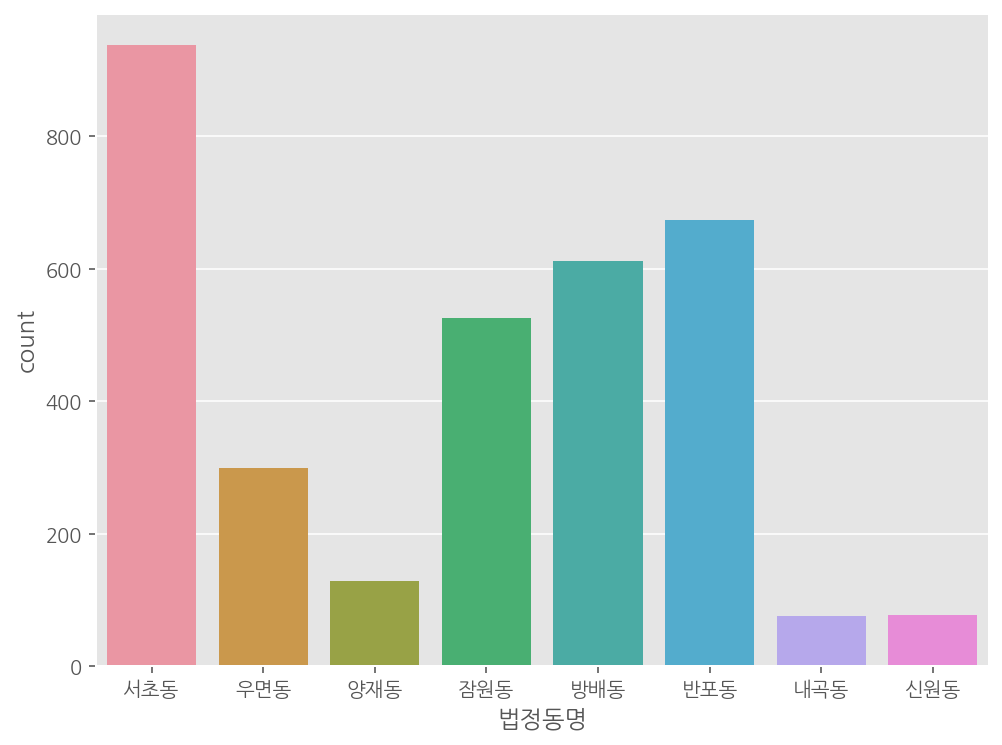

In [ ]:
# 부동산 아파트 거래량 시각화
plt.figure(figsize=(8,6))
sns.countplot(x = '법정동명', data = df3)

* 실거래가 반포동>잠원동>방배동 순서로 비쌈
* 거래량 top1은 서초동

## 용산구

In [ ]:
df4 = df1[df1['자치구명'] == '용산구'].copy()
df4.head()

,자치구명,법정동명,건물면적,건물주용도,물건금액
3,용산구,산천동,59.55,아파트,830000000
4,용산구,이촌동,64.43,아파트,735000000
5,용산구,이태원동,105.75,아파트,1430000000
7,용산구,후암동,150.08,아파트,875000000
11,용산구,후암동,137.37,아파트,800000000


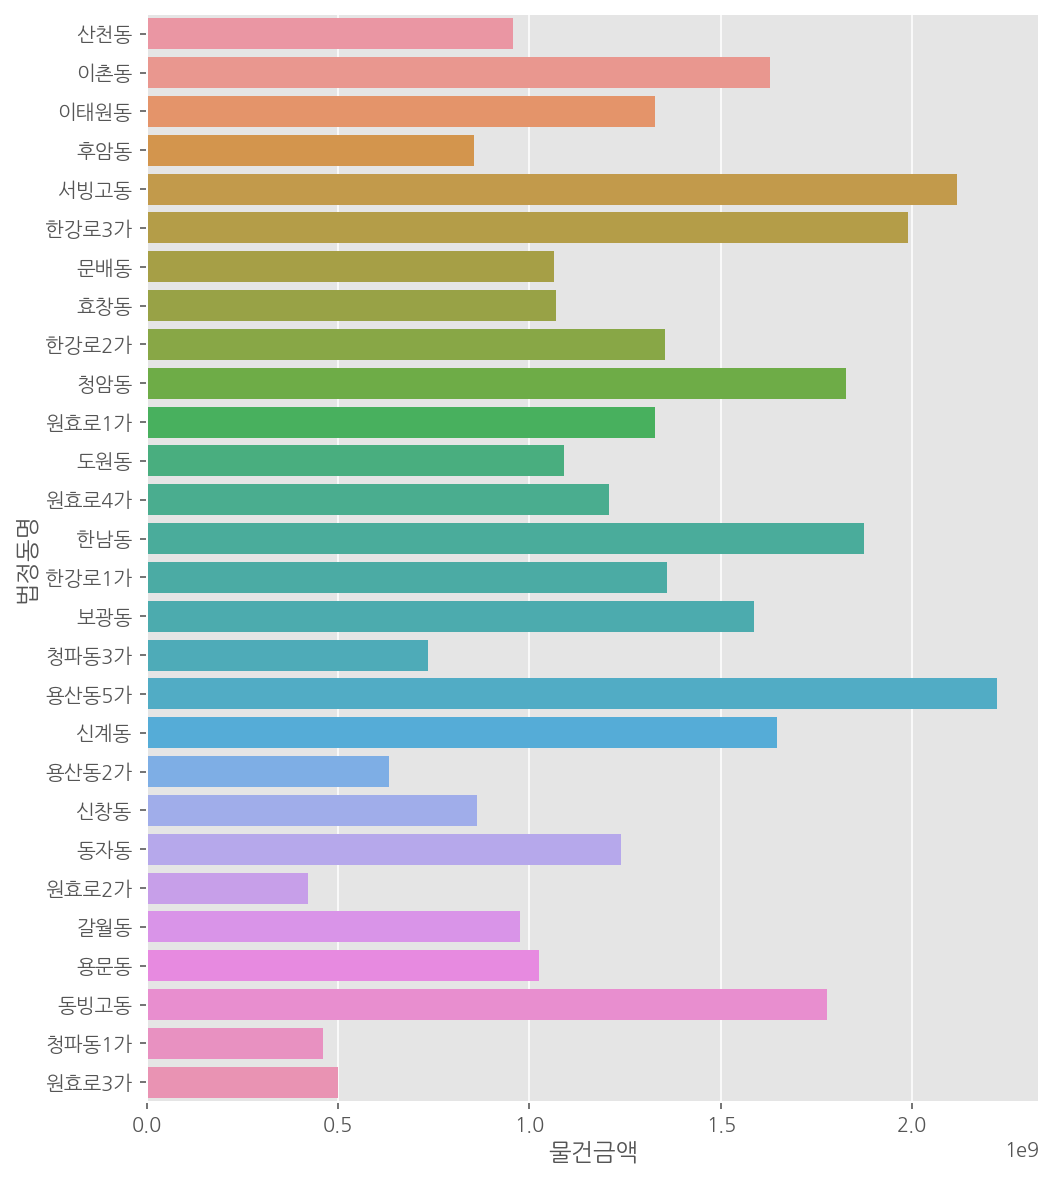

In [ ]:
# 부동산 실거래 최고가 시각화
plt.figure(figsize=(8,10))
sns.barplot(x = '물건금액', y='법정동명', data = df4, ci = None)

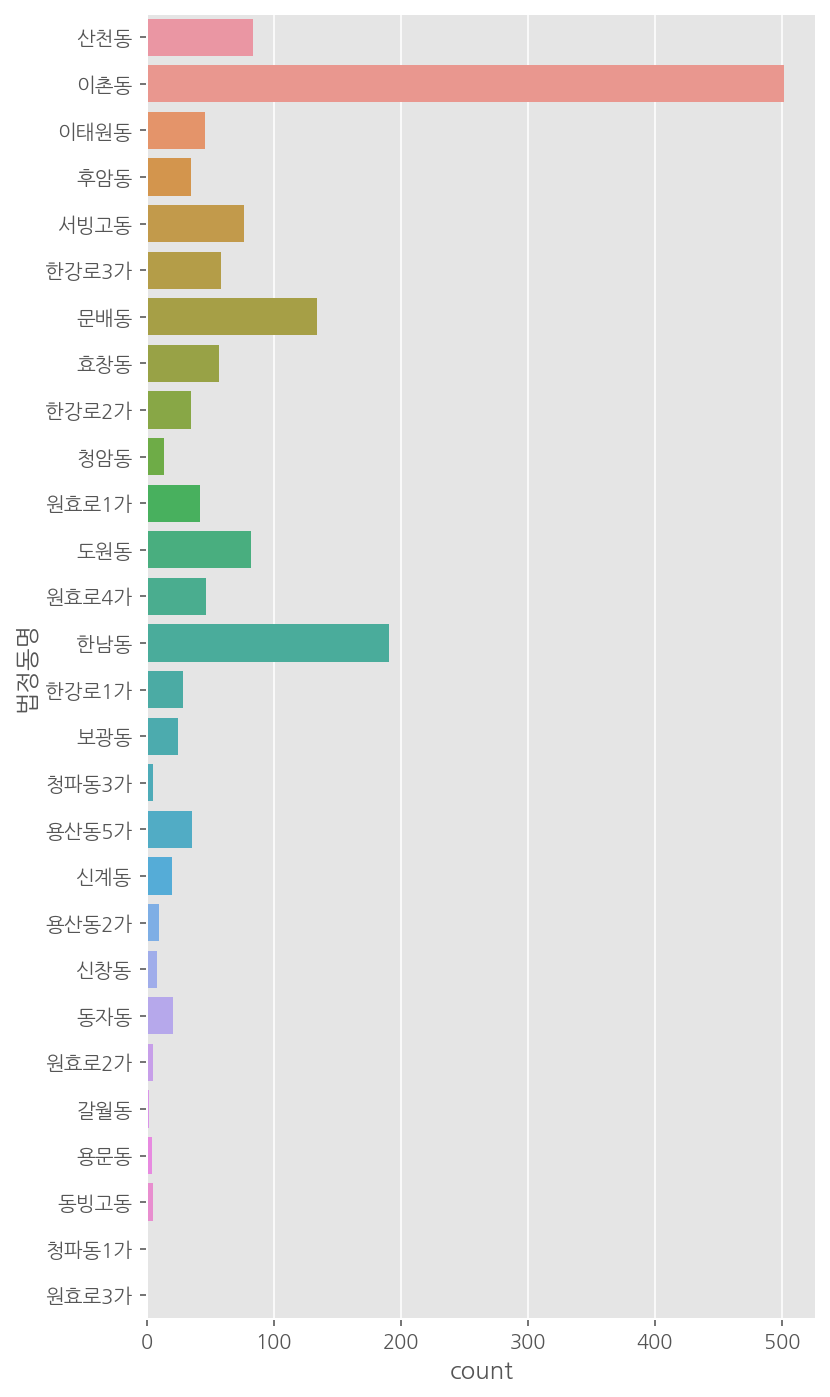

In [ ]:
# 부동산 아파트 거래량 시각화
plt.figure(figsize=(6,12))
sns.countplot(y = '법정동명', data = df4)

* 실거래가 용산동5가>서빙고동>한강로3가 순서로 비쌈
* 거래량 top1은 이촌동

# 오피스텔

In [ ]:
df1 = df[df['건물주용도'] == '오피스텔'].copy()
df1

,자치구명,법정동명,건물면적,건물주용도,물건금액
8,성동구,도선동,23.61,오피스텔,313000000
42,광진구,구의동,32.19,오피스텔,165000000
45,성동구,성수동1가,39.15,오피스텔,300000000
51,성동구,성수동1가,39.15,오피스텔,262000000
54,성동구,행당동,24.84,오피스텔,151000000
...,...,...,...,...,...
175958,마포구,아현동,35.76,오피스텔,365000000
175959,마포구,신공덕동,40.30,오피스텔,308000000
175961,마포구,성산동,19.81,오피스텔,139000000
175962,마포구,성산동,18.55,오피스텔,140000000


In [ ]:
df1['물건금액'].max()

6218600000

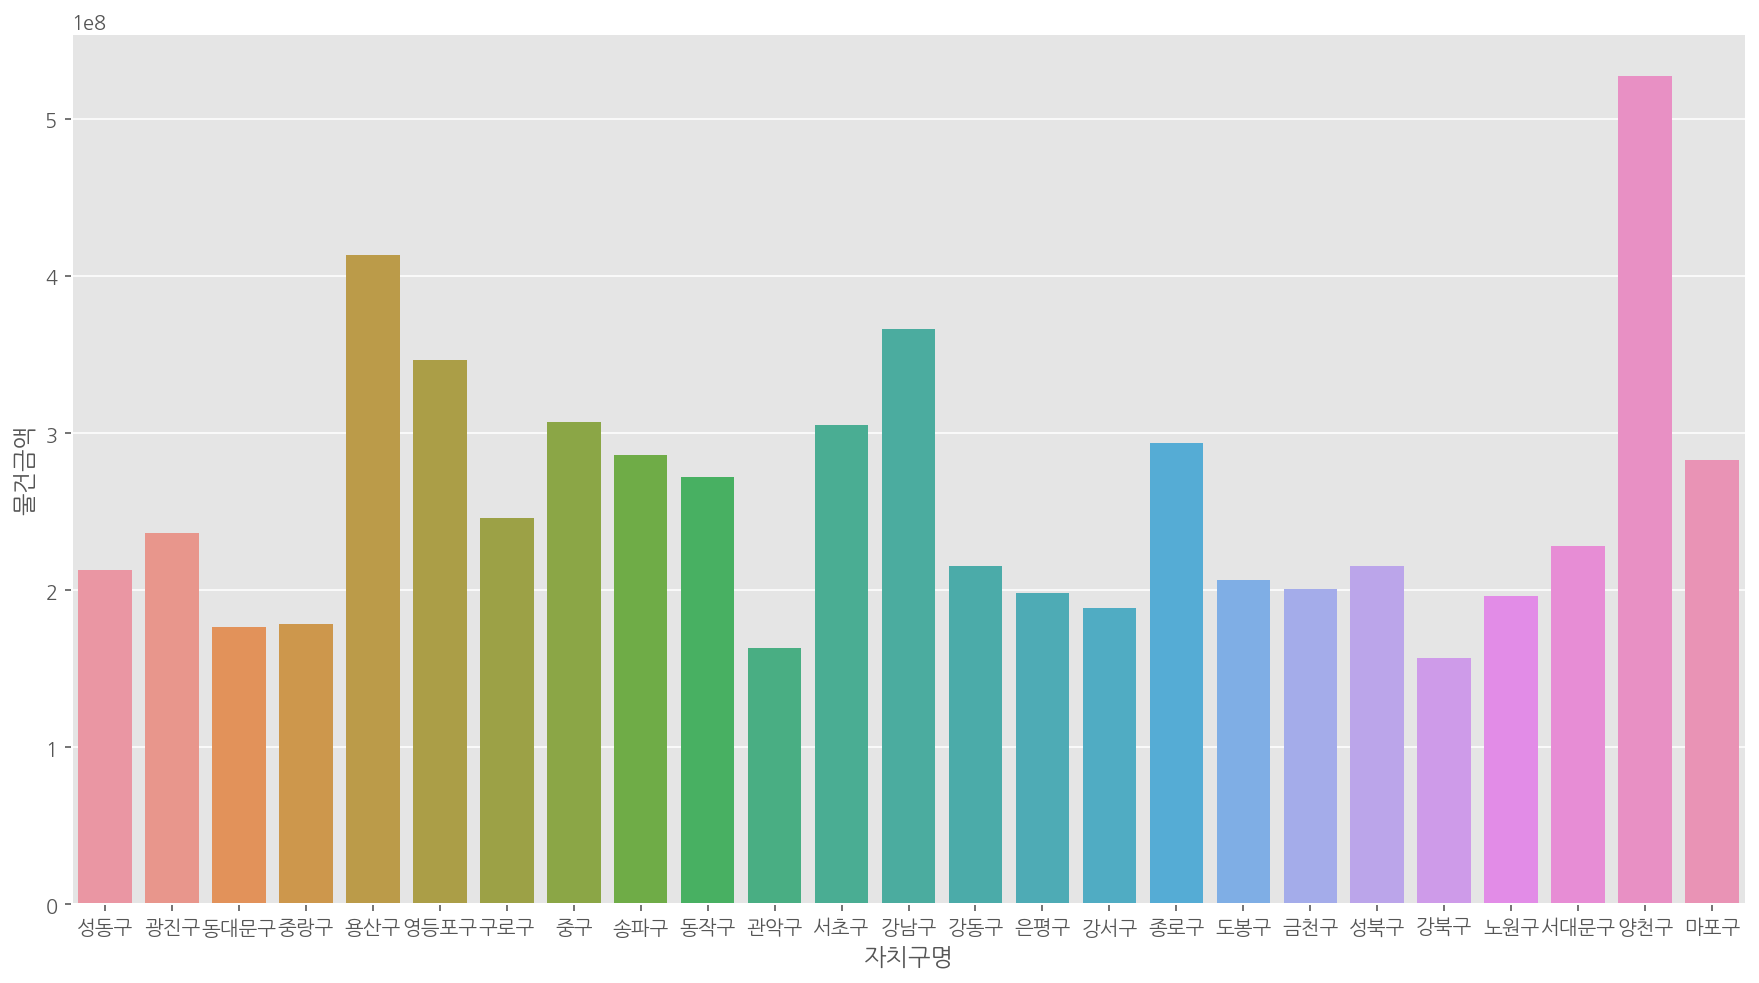

In [ ]:
# 부동산 오피스텔 실거래 최고가 시각화
plt.figure(figsize=(15,8))
sns.barplot(x = '자치구명', y='물건금액', data = df1, ci = None)

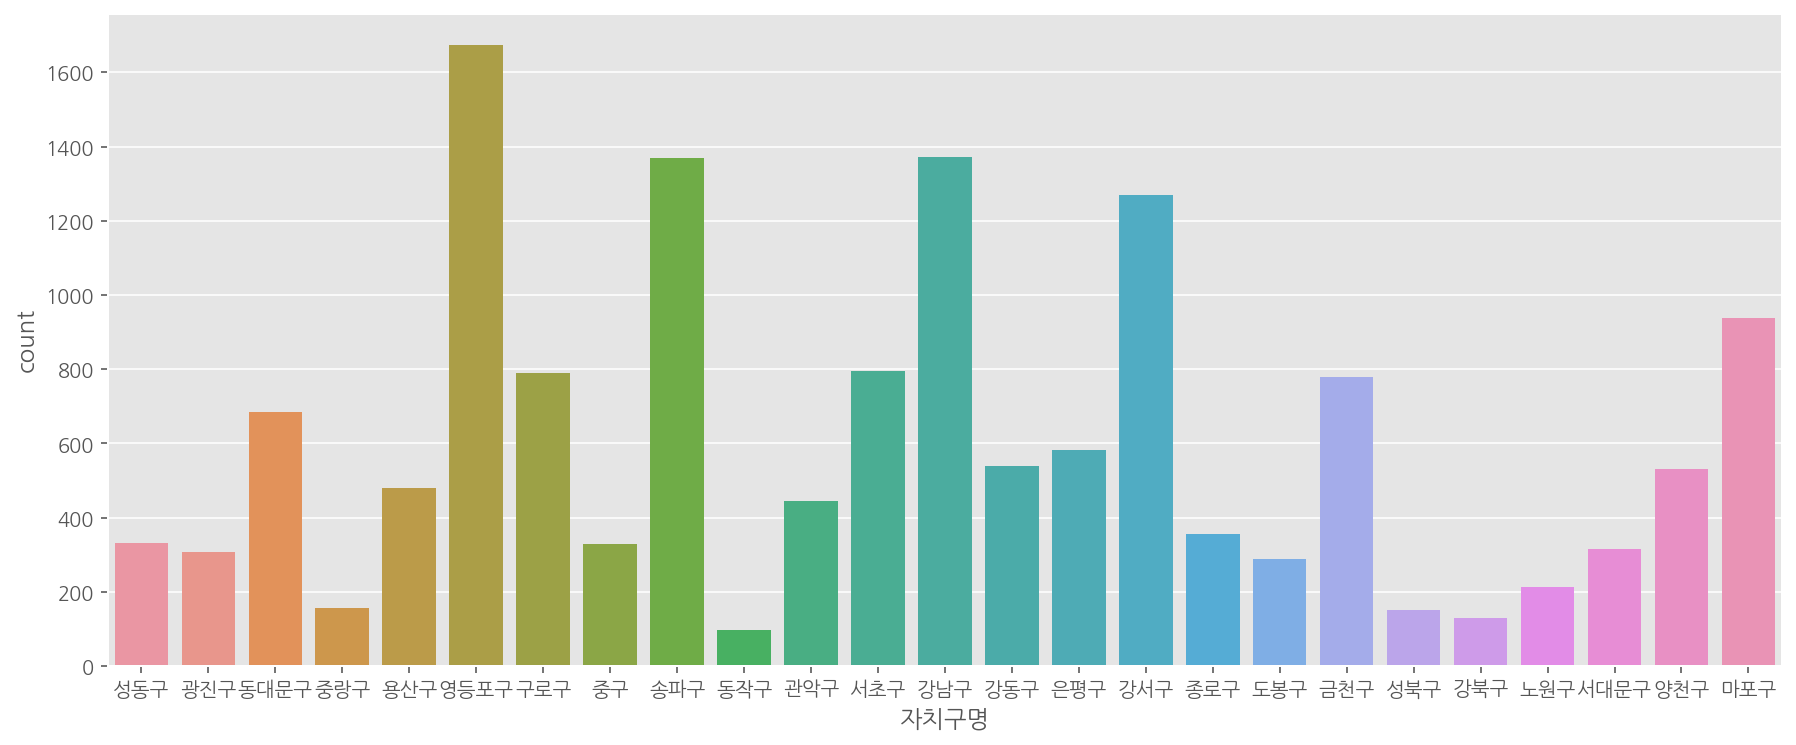

In [ ]:
# 부동산 오피스텔 거래량 시각화
plt.figure(figsize=(15,6))
sns.countplot(x = '자치구명', data = df1)

In [ ]:
df1['법정동명'].value_counts()

문정동    788
서초동    609
역삼동    562
구로동    465
화곡동    397
      ... 
마천동      1
묵동       1
둔촌동      1
쌍문동      1
구산동      1
Name: 법정동명, Length: 246, dtype: int64

* 오피스텔은 양천>용산>강남 순으로 실거래 가격이 비쌈
* 자치구 중 거래량 top1은 영등포구
* 법정동명 중 거래량 top1은 문정동

## 양천구

In [ ]:
df2 = df1[df1['자치구명'] == '양천구'].copy()
df2.head()

,자치구명,법정동명,건물면적,건물주용도,물건금액
124844,양천구,목동,83.23,오피스텔,950000000
124855,양천구,목동,204.95,오피스텔,1980000000
124860,양천구,목동,37.37,오피스텔,182000000
124885,양천구,목동,37.20,오피스텔,205000000
124925,양천구,목동,46.63,오피스텔,230000000


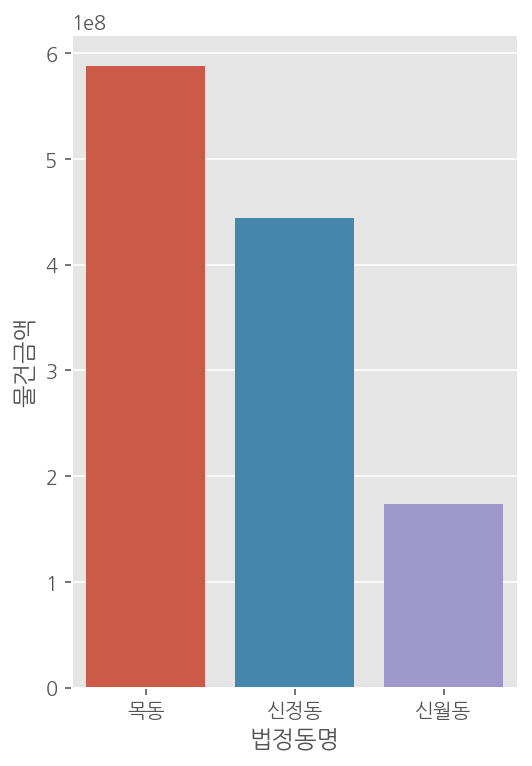

In [ ]:
# 부동산 실거래 최고가 시각화
plt.figure(figsize=(4,6))
sns.barplot(x = '법정동명', y='물건금액', data = df2, ci = None)

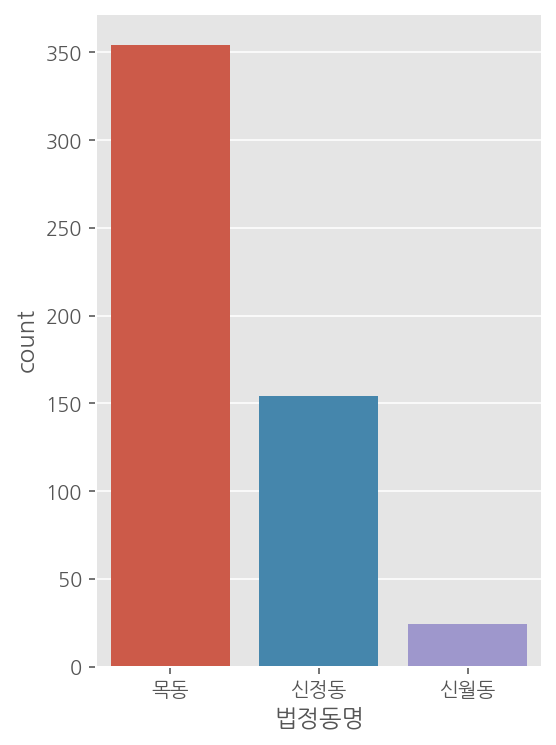

In [ ]:
# 부동산 오피스텔 거래량 시각화
plt.figure(figsize=(4,6))
sns.countplot(x = '법정동명', data = df2)

* 실거래 가격은 목동이 가장 비쌈
* 거래량 top1은 목동

## 용산구

In [ ]:
df3 = df1[df1['자치구명'] == '용산구'].copy()
df3.head()

,자치구명,법정동명,건물면적,건물주용도,물건금액
5861,용산구,원효로3가,38.12,오피스텔,165000000
25096,용산구,문배동,39.07,오피스텔,420000000
25111,용산구,원효로3가,38.12,오피스텔,155000000
25280,용산구,한강로3가,52.80,오피스텔,195000000
25289,용산구,서계동,28.11,오피스텔,299000000


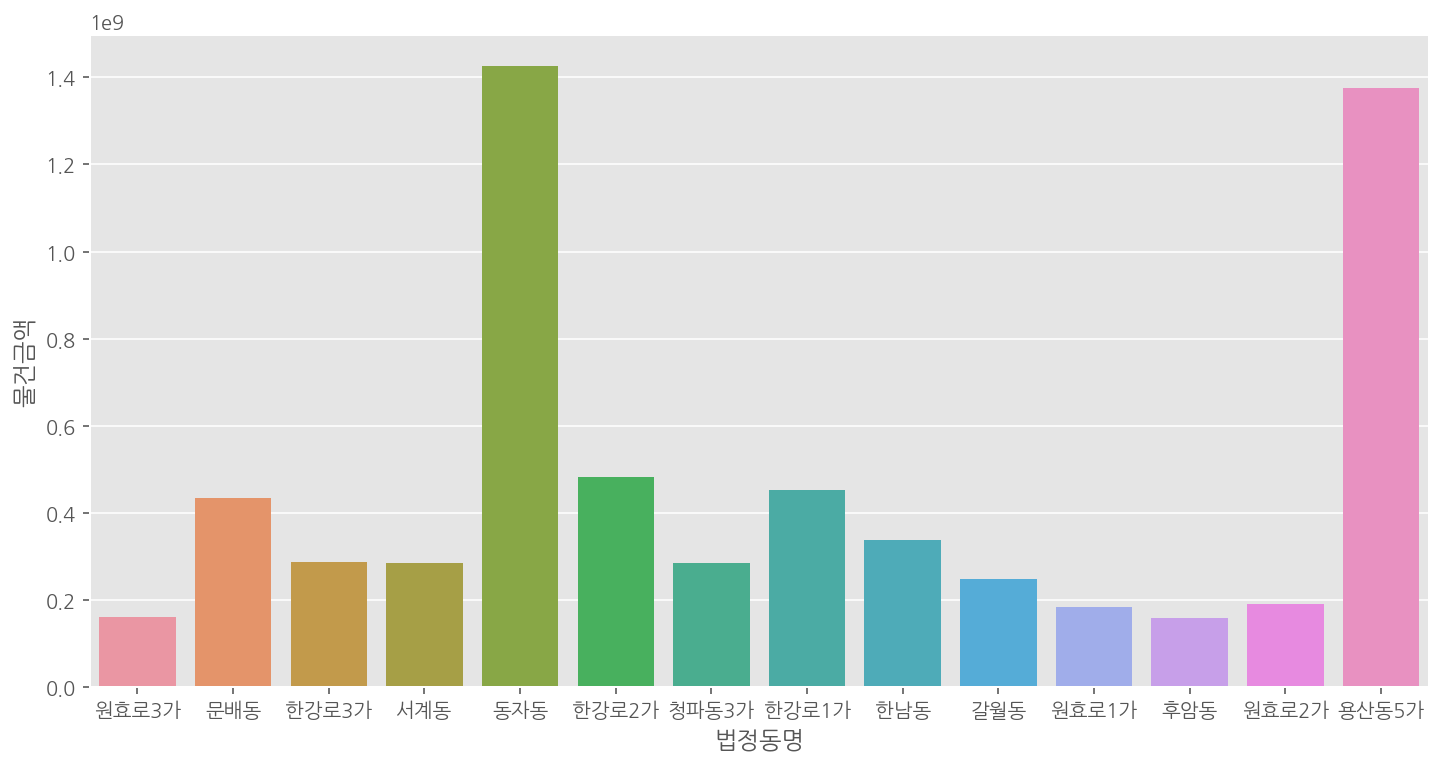

In [ ]:
# 부동산 실거래 최고가 시각화
plt.figure(figsize=(12,6))
sns.barplot(x = '법정동명', y='물건금액', data = df3, ci = None)

In [ ]:
df3['법정동명'].unique()

array(['원효로3가', '문배동', '한강로3가', '서계동', '동자동', '한강로2가', '청파동3가', '한강로1가',
       '한남동', '갈월동', '원효로1가', '후암동', '원효로2가', '용산동5가'], dtype=object)

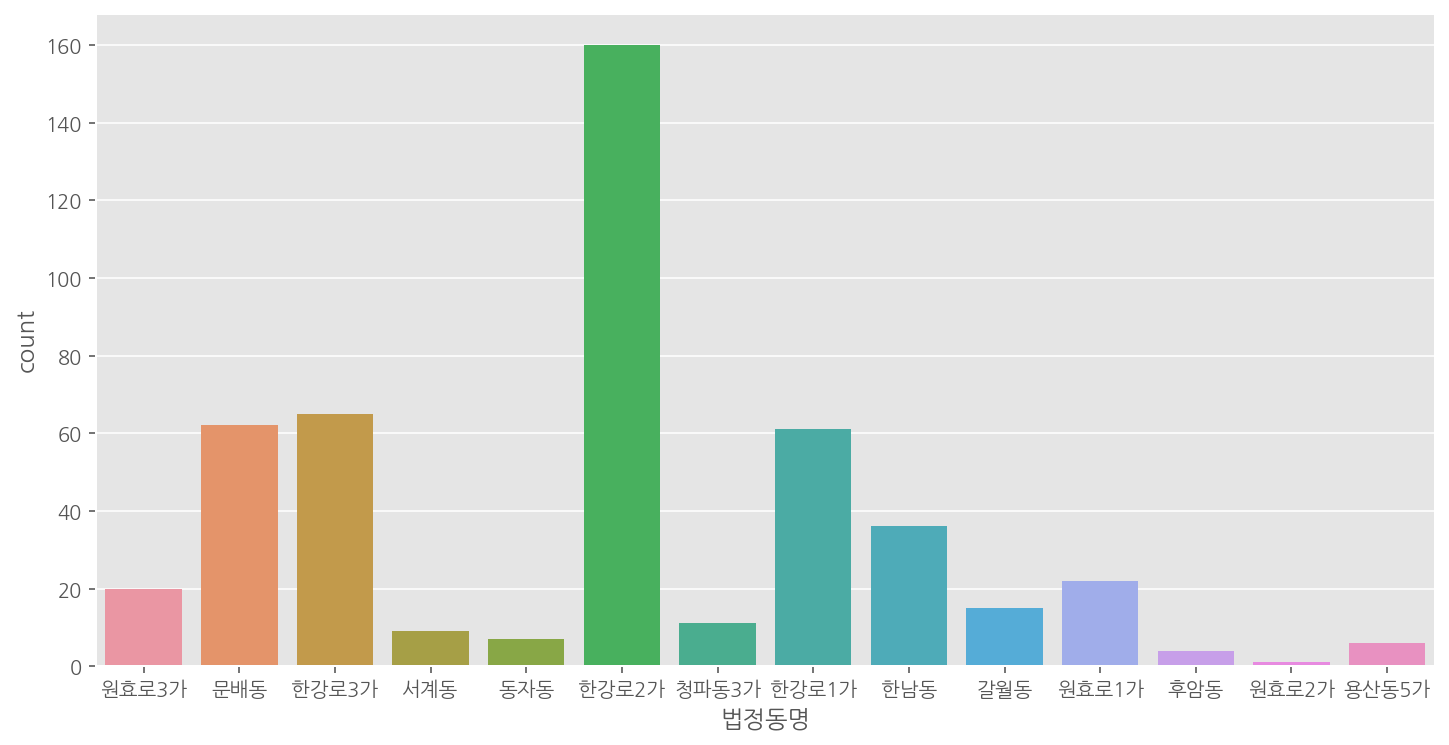

In [ ]:
# 부동산 오피스텔 거래량 시각화
plt.figure(figsize=(12,6))
sns.countplot(x = '법정동명', data = df3)

* 실거래가는 동자>용산동5가>한강로2가 순으로 비쌈
* 거래량 top1은 한강로2가

## 강남구

In [ ]:
df4 = df1[df1['자치구명'] == '강남구'].copy()
df4.head()

,자치구명,법정동명,건물면적,건물주용도,물건금액
38037,강남구,역삼동,24.63,오피스텔,308000000
38038,강남구,도곡동,163.05,오피스텔,1700000000
38043,강남구,도곡동,39.31,오피스텔,215000000
38049,강남구,역삼동,32.03,오피스텔,225000000
38051,강남구,역삼동,33.59,오피스텔,238000000


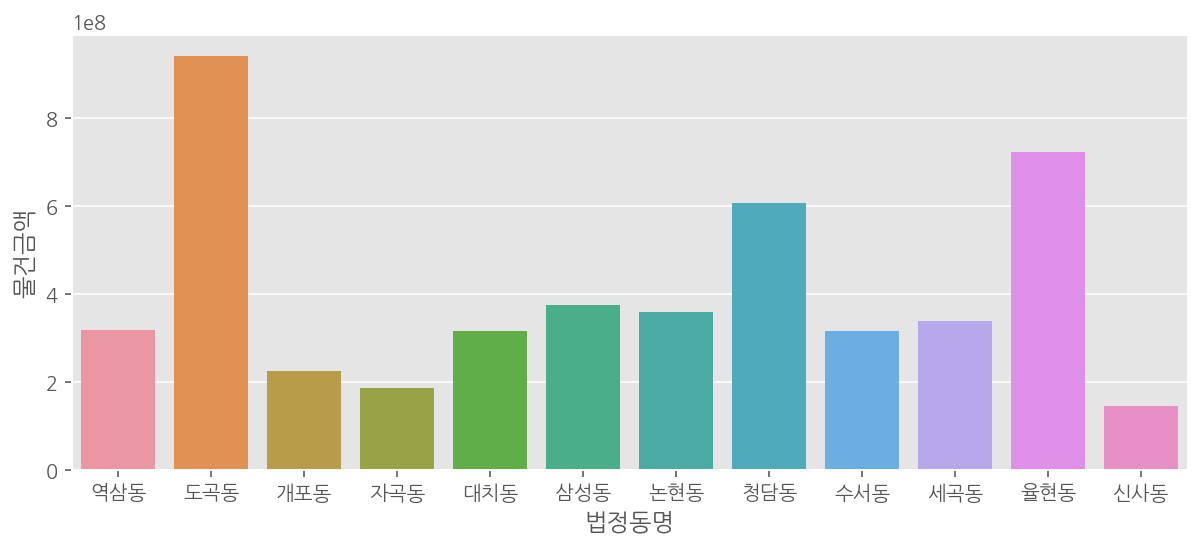

In [ ]:
# 부동산 실거래 최고가 시각화
plt.figure(figsize=(10,4))
sns.barplot(x = '법정동명', y='물건금액', data = df4, ci = None)

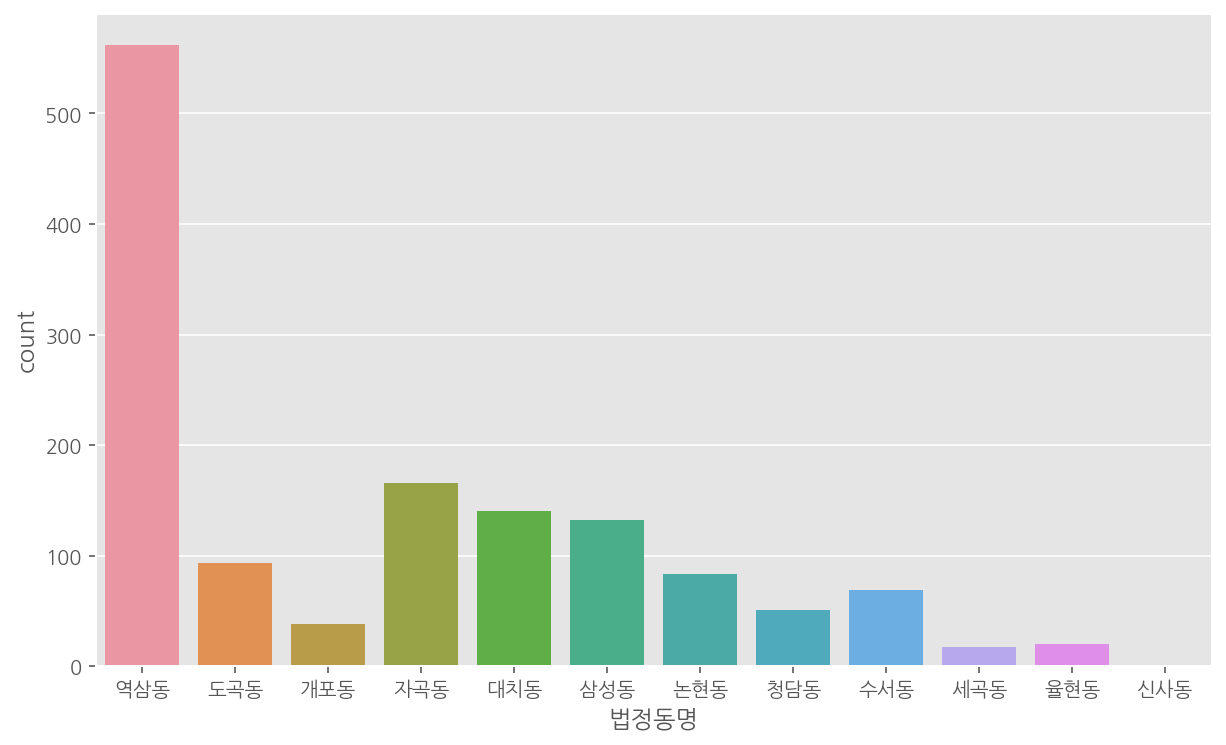

In [ ]:
# 부동산 오피스텔 거래량 시각화
plt.figure(figsize=(10,6))
sns.countplot(x = '법정동명', data = df4)

* 실거래가는 도곡>율현>청담 순으로 비쌈
* 거래량 top1은 역삼동

# 연립주택

In [ ]:
df1 = df[df['건물주용도'] == '연립주택'].copy()
df1

,자치구명,법정동명,건물면적,건물주용도,물건금액
6,용산구,청파동2가,73.04,연립주택,400000000
13,광진구,중곡동,48.08,연립주택,300000000
26,성동구,응봉동,59.46,연립주택,184000000
33,성동구,금호동3가,37.11,연립주택,650000000
38,광진구,자양동,59.70,연립주택,410000000
...,...,...,...,...,...
175978,마포구,연남동,41.04,연립주택,225000000
175980,마포구,합정동,46.10,연립주택,250000000
175982,마포구,연남동,57.02,연립주택,450000000
175983,마포구,성산동,56.48,연립주택,300000000


In [ ]:
df1['물건금액'].max()

7000000000

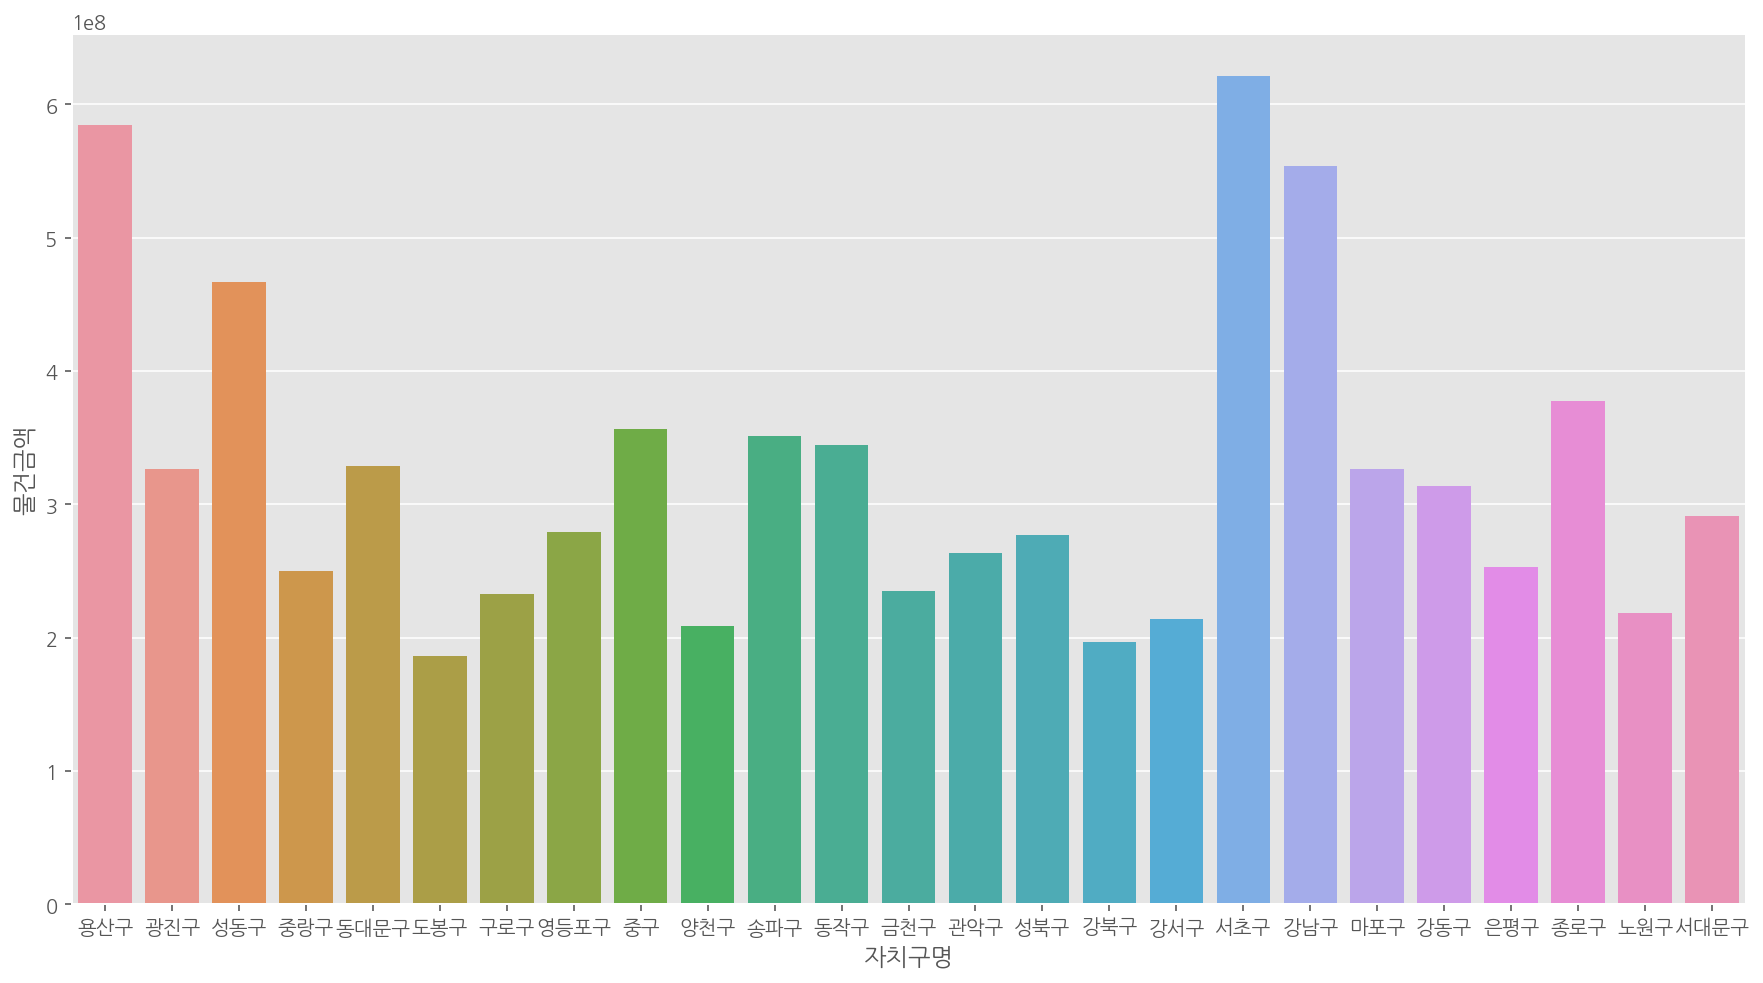

In [ ]:
# 부동산 연립주택 실거래 최고가 시각화
plt.figure(figsize=(15,8))
sns.barplot(x = '자치구명', y='물건금액', data = df1, ci = None)

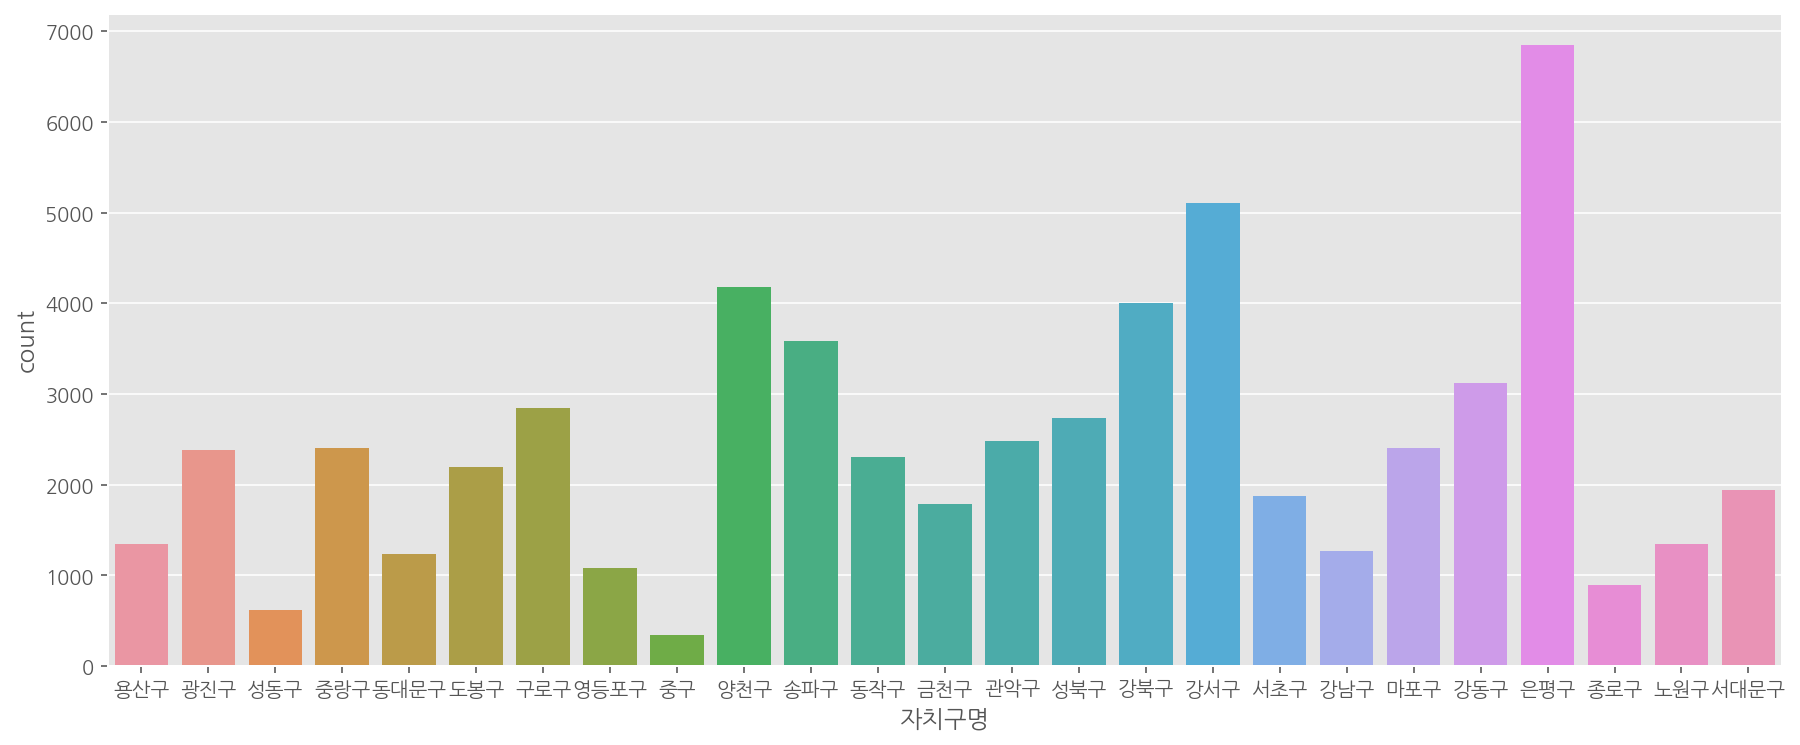

In [ ]:
# 부동산 연립주택 거래량 시각화
plt.figure(figsize=(15,6))
sns.countplot(x = '자치구명', data = df1)

In [ ]:
df1['법정동명'].value_counts()

화곡동      3760
신월동      2016
목동       1562
수유동      1459
미아동      1436
         ... 
동선동2가       1
토정동         1
통인동         1
자곡동         1
산천동         1
Name: 법정동명, Length: 307, dtype: int64

* 연립주택은 서초>용산>강남 순으로 실거래 가격이 비쌈
* 자치구 중 거래량 top1은 은평구
* 법정동명 중 거래량 top1은 화곡동

## 서초구

In [ ]:
df2 = df1[df1['자치구명'] == '서초구'].copy()
df2.head()

,자치구명,법정동명,건물면적,건물주용도,물건금액
31743,서초구,서초동,60.29,연립주택,500000000
31749,서초구,양재동,76.56,연립주택,558000000
31750,서초구,반포동,24.83,연립주택,220000000
31751,서초구,방배동,29.86,연립주택,400000000
31755,서초구,방배동,17.46,연립주택,360000000


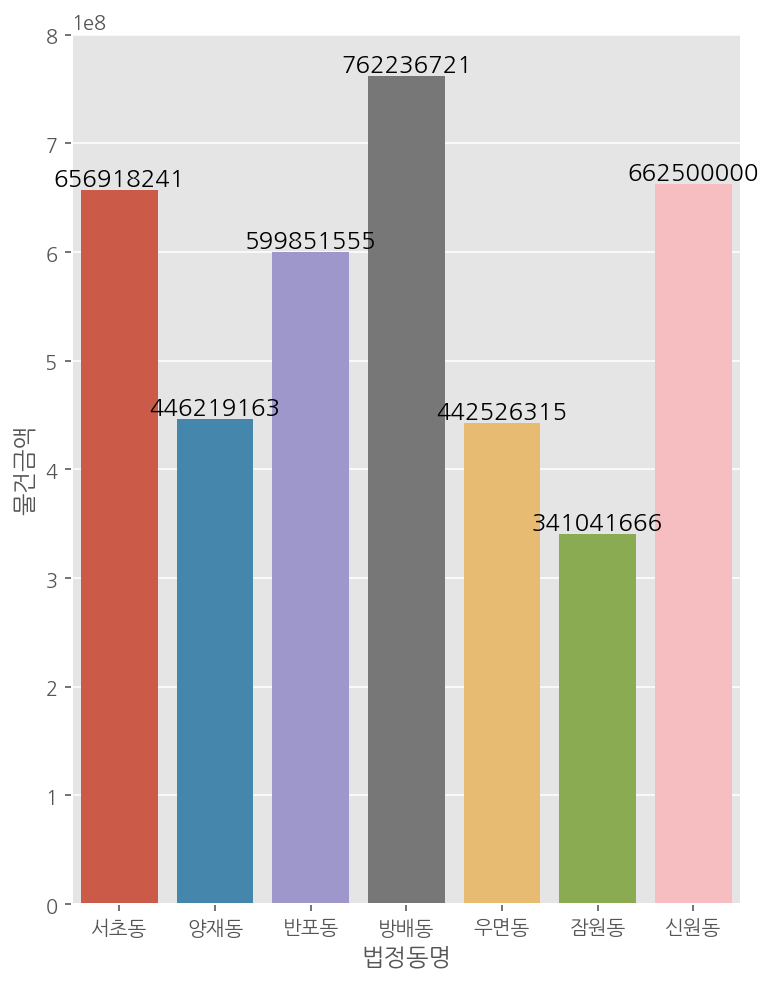

In [ ]:
plt.figure(figsize=(6,8))
sns.barplot(x = '법정동명', y = '물건금액', data = df2, ci = None)
ax = plt.gca()

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

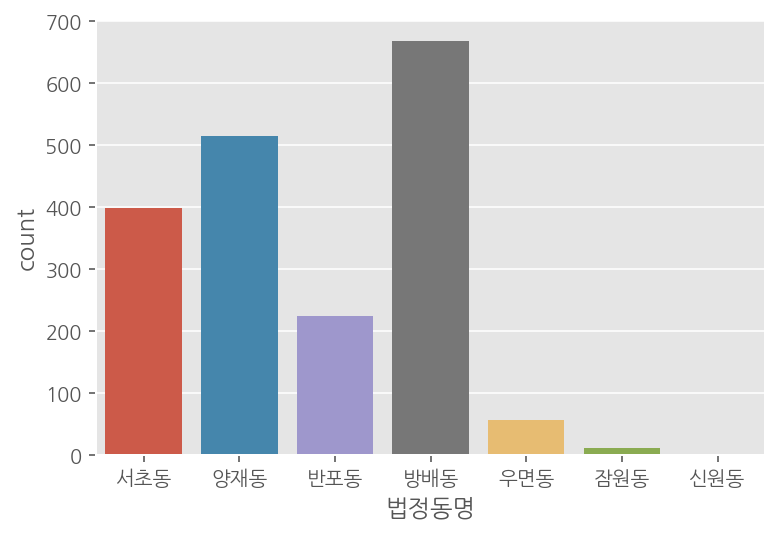

In [ ]:
sns.countplot(x = '법정동명', data = df2)

* 실거래가는 방배>신원>서초 순으로 비쌈
* 거래량 top1은 방배동

## 용산구

In [ ]:
df3 = df1[df1['자치구명'] == '용산구'].copy()
df3.head()

,자치구명,법정동명,건물면적,건물주용도,물건금액
6,용산구,청파동2가,73.04,연립주택,400000000
50,용산구,청파동1가,58.08,연립주택,420000000
83,용산구,효창동,64.00,연립주택,405000000
108,용산구,용문동,57.89,연립주택,475000000
109,용산구,용문동,44.60,연립주택,317000000


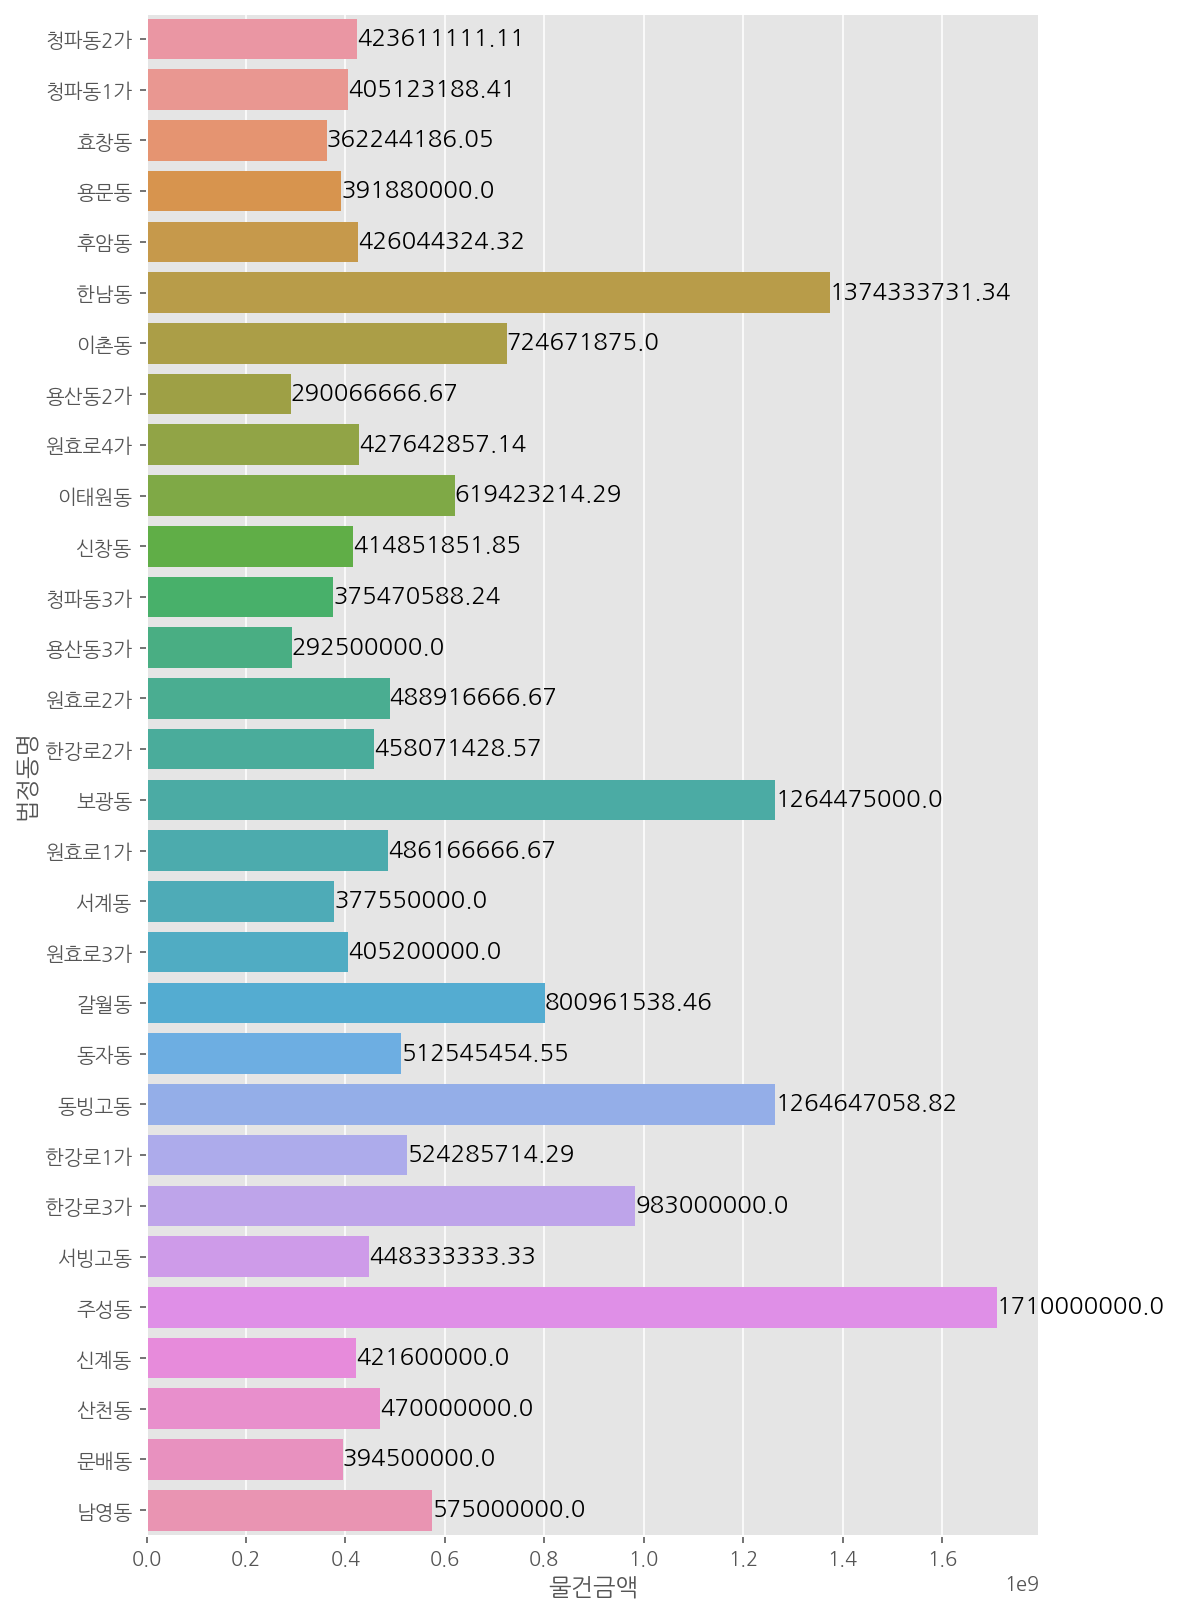

In [ ]:
plt.figure(figsize=(8,14))
sns.barplot(x = '물건금액', y = '법정동명', data = df3, ci = None)
ax = plt.gca()
for i in ax.patches:
  plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()),2)),
           fontsize = 12, color = 'black')
plt.show()

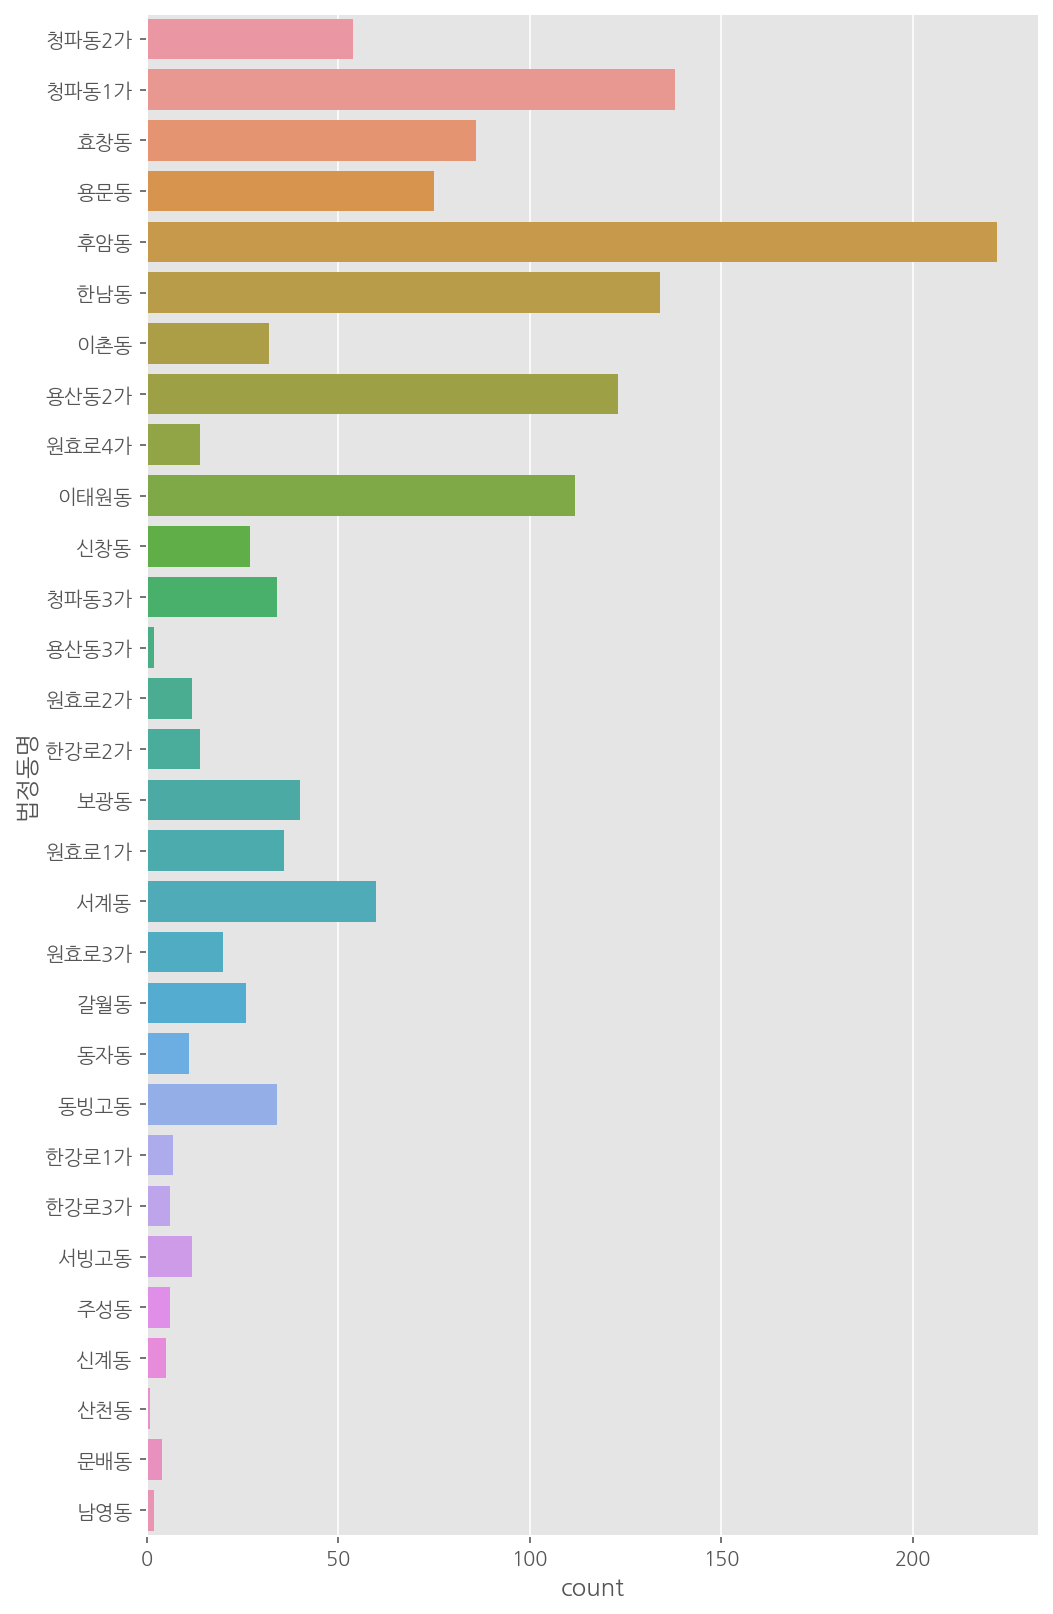

In [ ]:
plt.figure(figsize=(8,14))
sns.countplot(y = '법정동명', data = df3)

* 실거래가는 주성동>한남동>동빙고동 순으로 비쌈
* 거래량 top1은 후암동

## 강남구

In [ ]:
df4 = df1[df1['자치구명'] == '강남구'].copy()
df4.head()

,자치구명,법정동명,건물면적,건물주용도,물건금액
38040,강남구,개포동,36.84,연립주택,500000000
38048,강남구,개포동,70.60,연립주택,500000000
38054,강남구,개포동,43.65,연립주택,420000000
38056,강남구,역삼동,27.79,연립주택,298000000
38064,강남구,논현동,29.67,연립주택,352500000


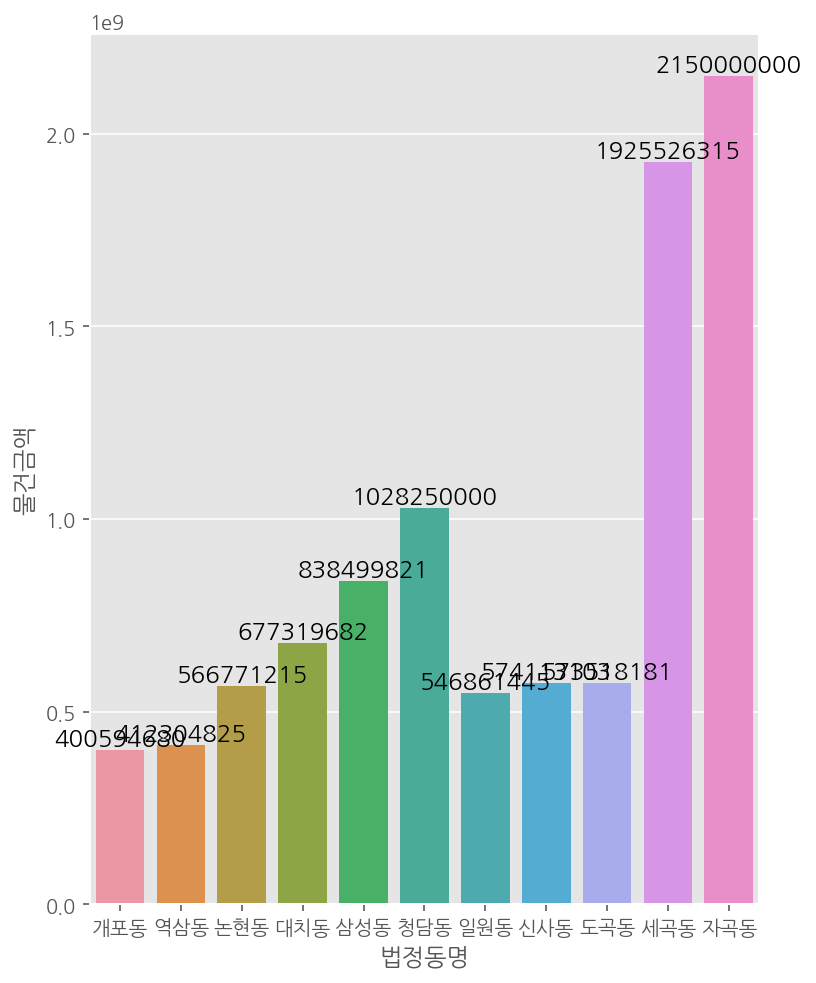

In [ ]:
plt.figure(figsize=(6,8))
sns.barplot(x = '법정동명', y = '물건금액', data = df4, ci = None)
ax = plt.gca()

# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

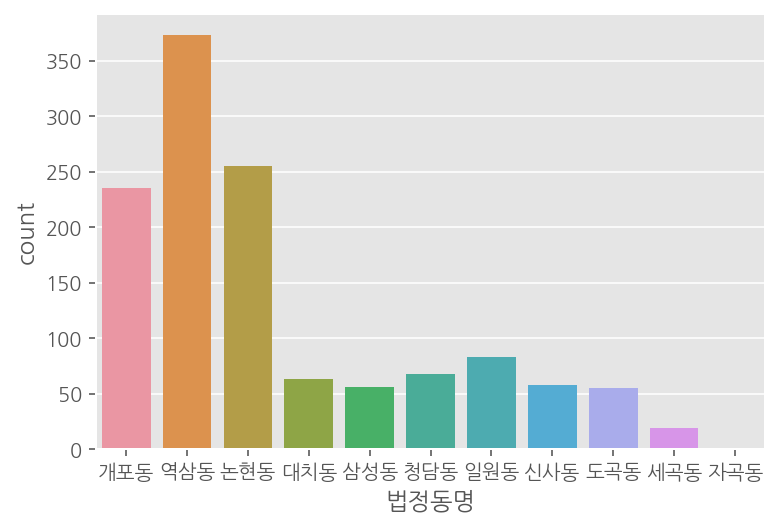

In [ ]:
sns.countplot(x = '법정동명', data = df4)

* 실거래가는 자곡>세곡>청담 순으로 비쌈
* 거래량 top1은 역삼동